# Успешность компьютерных игр

**Цель проекта:** 
изучение факторов, влияющих на успешность компьютерной игры у пользователей Северной Америки, Японии и Европы для планирования рекламных компаний на предстоящий год.

**Зказчик проекта:** интернет-магазин компьютерных игр "Стримчик".

Для анализа был предоставлен датафрейм, содержащий информацию о компьютерных играх за период с 1980 года по 2016 год.


**Описание данных :** 

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales**— продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.





## Импортируем библиотеки

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from scipy import stats as st
import numpy as np

 Познакомимся с датасетом:

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Датафрейм имеет размер 16715 строк на 11 столбцов В 6 столбцах содержатся пропущенные значения. Основной массив игр, представленный в датасете, выпущен в период с 2003 года по 2010 год. Значение оценок критиков расположились в диапазоне от 13 баллов до 98 баллов. В датасете много нулевых значений, возможно, это связано с отсутствием продаж конкретных игр в определенном регионе. Похоже, по продажам в Японии менее всего данных. К тому же рейтинг составлен американским агентством, что может объяснить просадку в данных по японским играм.

## Подготовка данных

### Преведем названия столбцов к "змеиному" регистру:

In [5]:
data = data.rename(columns = {
    'Name':'name',
    'Platform':'platform',
    'Year_of_Release':'year_of_release',
    'Genre':'genre',
    'NA_sales':'na_sales',
    'EU_sales':'eu_sales',
    'JP_sales':'jp_sales',
    'Other_sales':'other_sales',
    'Critic_Score':'critic_score',
    'User_Score':'user_score',
    'Rating':'rating'
    })

Проверяем преобразование

In [6]:
display(data.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Столбцы переименованы.

### Теперь разберемся с типами данных.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Типы данных должны соответствовать виду информации, которую они отображают, и поддерживать соответствующие этой информации преобразования.
В настоящем датафрейме, стоит преобразовать:  
столбец 'year_of_release' в ~datetime, чтобы при преобразованиях программа понимала,что это обозначения года~ int  
       'user_score'      в float, чтобы возможно было производить математические операции с оценками пользователей.  
Остальные пока оставим без изменения, они отражают свойства данных. 

Посмотрим какие года представлены в датасете:

In [8]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

Прежде чем менять тип данных надо разобраться с пропусками. Заменим их на 0. Так как 0 будет аномальным значением для года.

In [9]:
data['year_of_release'] = data['year_of_release'].fillna(0)

А теперь поменяем тип на int

In [10]:
data['year_of_release'] = data['year_of_release'].astype('int')

### Оценим наличие полных дубликатов строк в датафрейме:

In [11]:
data.duplicated().sum()

0

Полных дубликатов нет

Теперь займемся пропусками в **user_score**

In [12]:
data['user_score'].isna().sum()

6701

Чуть менее 50% пропусков в столбце оценок пользователей, достаточно много, чтобы удалять.

Посмотрим на набор оценок пользователей:

In [13]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Вариативный ряд оценок от 0 до 9.7, пропущенные значения и  странная оценка 'tbd' - "to be determined"(будет определено позднее), посмотрим, где она встречается:

In [14]:
data.query('user_score == "tbd"')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


2424 строки, прилично. Заменим их на 0. Hулевые значение  будут обозначать отсутствующие значения в этом столбце.

In [15]:
data.loc[data['user_score'] == 'tbd','user_score']='0'


In [16]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

"tbd" успешно заменено на 0.

### Обработаем пропуски 

Теперь займемся пропусками в **user_score**

In [17]:
data['user_score'].isna().sum()

6701

Чуть менее 50% пропусков в столбце оценок пользователей, достаточно много, чтобы удалять.

 Можно заменить все NaN в user_score  на 0. Но прежде посмотрим не сочитаются ли пропуски в user_score с critic_score и rating

In [18]:
nan_user_score = data.query('user_score.isna() and critic_score.isna() and rating.isna()')

In [20]:
display(nan_user_score.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


 Игры разных годов выпуска, разных жанров и платформ имеют синхронные сбои в оценке. Похоже на технические проблемы. Восстанавливать эти рейтинги группировкой по какому-либо значению(например по жанру) не верно. Оставим пока как есть. А в user_score заменим NaN на 0.

In [21]:
data['user_score'].isna().sum()
data['user_score'] = data['user_score'].fillna(0)

И сразу изменим тип данных на float

In [22]:
data['user_score'] = pd.to_numeric(data['user_score'],errors = 'coerce')

In [23]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Проверим, сколько теперь нулевых значений в user_score:

In [24]:
data.query('user_score == 0')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,0.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,0.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,0.0,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,0.0,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,0.0,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,0.0,NaN


Всё верно, мы заменили на 0 все пропуски и 'tbd'и 1 ноль добавился из рейтинга. И тип данных изменился на float.

Перейдем к столбцу  **name**:

Посчитаем пропуски

In [25]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,0.0,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,0.0,NaN


Всего 2 пропущенные строчки, похоже на ошибки при выгрузке, рейтинг остался, а название игры пропало. Можно удалить, полезной информации в них не найти, название игры не восстановить.

In [26]:
data = data.drop(index = [659,14244])

Займемся столбцом **Year_of_Release**

Посчитаем количество пропусков

In [27]:
data['year_of_release'].isna().sum()

0

Пропущенных значений нет.

Рассмотрим, какие года представлены в столбце 'year_of_release':

In [28]:
data['year_of_release'].sort_values().unique()

array([   0, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016])

Датафрейм содержит данные с 1980 года по 2016 год.

In [29]:
data['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
0        269
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

Больше всего данных представлено за период с 2006 года по 2011 год. 1980 представлен скромнее всех годов -всего 9 значений.

Теперь изучим информацию о жанре в столбце **genre**:

Посчитам пропуски

In [30]:
data['genre'].isna().sum()

0

Пропущенных значений нет.

Посмотрим какие значения хранит столбец genre:

In [31]:
data['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Посмотрим, какие игровые платформы представлены в датасете:

In [33]:
data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Самые популярные: Sony PlayStation 2 и Nintendo DS

Посчитаем количество пропущенных значений:

In [34]:
data['platform'].isna().sum()

0

Пропусков нет. Тип данных соответствует типу информации.

Обратимся к столбцу **na_sales**:

Изучим значения, которые хранит столбец

In [35]:
data['na_sales'].sort_values().unique()

array([0.000e+00, 1.000e-02, 2.000e-02, 3.000e-02, 4.000e-02, 5.000e-02,
       6.000e-02, 7.000e-02, 8.000e-02, 9.000e-02, 1.000e-01, 1.100e-01,
       1.200e-01, 1.300e-01, 1.400e-01, 1.500e-01, 1.600e-01, 1.700e-01,
       1.800e-01, 1.900e-01, 2.000e-01, 2.100e-01, 2.200e-01, 2.300e-01,
       2.400e-01, 2.500e-01, 2.600e-01, 2.700e-01, 2.800e-01, 2.900e-01,
       3.000e-01, 3.100e-01, 3.200e-01, 3.300e-01, 3.400e-01, 3.500e-01,
       3.600e-01, 3.700e-01, 3.800e-01, 3.900e-01, 4.000e-01, 4.100e-01,
       4.200e-01, 4.300e-01, 4.400e-01, 4.500e-01, 4.600e-01, 4.700e-01,
       4.800e-01, 4.900e-01, 5.000e-01, 5.100e-01, 5.200e-01, 5.300e-01,
       5.400e-01, 5.500e-01, 5.600e-01, 5.700e-01, 5.800e-01, 5.900e-01,
       6.000e-01, 6.100e-01, 6.200e-01, 6.300e-01, 6.400e-01, 6.500e-01,
       6.600e-01, 6.700e-01, 6.800e-01, 6.900e-01, 7.000e-01, 7.100e-01,
       7.200e-01, 7.300e-01, 7.400e-01, 7.500e-01, 7.600e-01, 7.700e-01,
       7.800e-01, 7.900e-01, 8.000e-01, 8.100e-01, 

Есть дробные значения и нулевые, это нормально где-то продажи сильно не дотянули до миллиона.

In [36]:
data['na_sales'].isna().sum()

0

Пропусков нет

Изучим данные в столбце critic_score, оценки критиков.

In [37]:
data['critic_score'].isna().sum()

8576

Пропусков больше 50% ощутимый провал в данных. Если и заменить чем-то, так это 0, 0 будет означать отсутствие данных. Посмотрим, есть ли уже 0 в оценках:

In [38]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Отлично, нулей нет, значит 0 заменит NaN и будет означать отсутствие оценки

In [39]:
data['critic_score'] = data['critic_score'].fillna(0)

In [40]:
data['critic_score'].sort_values().unique()

array([ 0., 13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28.,
       29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41.,
       42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54.,
       55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67.,
       68., 69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80.,
       81., 82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93.,
       94., 95., 96., 97., 98.])

Все отлично!

Последний столбец с значениями рейтинга организации ESRB

In [41]:
data['rating'].isna().sum()

6764

Пропусков тоже много, по рейтингам чуть менее 50% информации отсутствует (видимо, технические проблемы).Посмотрим на значения столбца:

In [42]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Рейтинг категориальный, тип данных object подходит. Осталось заменить NaN на "tbd", здесь это не повредит

In [43]:
data['rating'] = data['rating'].fillna('tbd')

In [44]:
data['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'tbd'],
      dtype=object)

Все правильно!

По проведенной оценке данных был обнаружен большой объём отсутствующих данных ретинга игр, как пользовательский так и рейтинг от критиков и организации ESRB. Удалять это пропуски нельзя - исказим данные датафрейма. Просто принимаем решение заменить их на 0 в critic_score	и user_score, а в категориальной rating на "tbd".

 Посчитаем суммарные продажи во всех регионах и запишите их в отдельный столбец **sale_sum**:

In [45]:
data['sale_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

## Исследовательский анализ данных


 Посмотрим, сколько игр выпускалось в разные годы:

In [46]:
game_year = data.groupby(by ='year_of_release')['sale_sum'].sum()
print(game_year.sort_values())

year_of_release
1980     11.38
1983     16.80
1987     21.70
1982     28.88
1991     32.23
1981     35.68
1986     37.08
1993     45.99
1988     47.21
1990     49.37
1984     50.35
1985     53.95
1989     73.45
1992     76.16
1994     79.23
1995     88.12
0        98.92
2016    129.94
1996    199.15
1997    201.07
2000    201.66
1999    251.11
1998    256.31
2015    267.98
2001    331.46
2014    331.53
2012    355.84
2003    357.54
2013    361.24
2002    394.97
2004    418.68
2005    457.82
2011    507.58
2006    517.71
2010    590.13
2007    604.75
2009    658.82
2008    671.50
Name: sale_sum, dtype: float64


Перенесем полученные данные на график

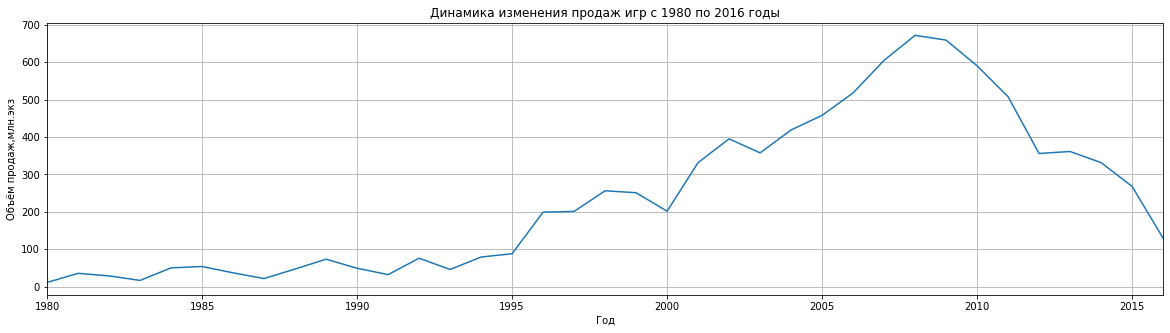

In [55]:
game_year.plot(xlim = (1980,2016), grid = True, xlabel = 'Год',ylabel = 'Объём продаж,млн.экз',
               title = 'Динамика изменения продаж игр с 1980 по 2016 годы', figsize = (20,5));

Пик роста продаж компьютеных игр приходится на 2008 год. Активный рост пришелся на 1995 год и к 2015 году спустились на уровень 1998 года.

 Посмотрим как распределяются продажи по игровым платформам:

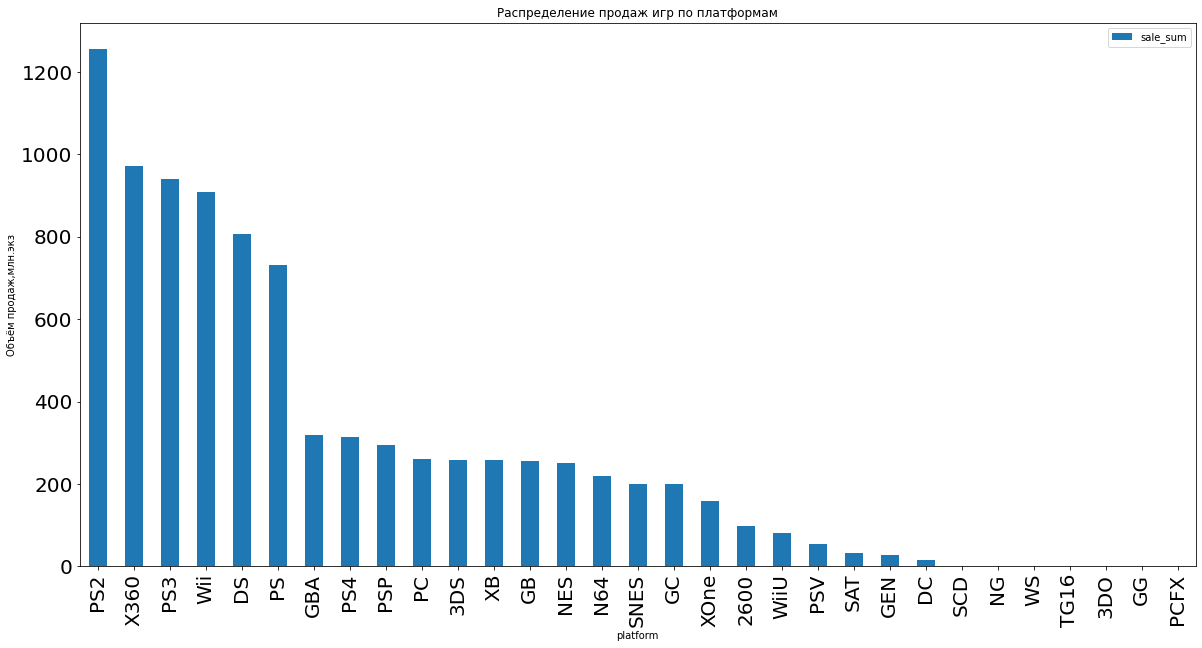

In [57]:
(data.pivot_table(index = 'platform', values = 'sale_sum', aggfunc = 'sum')
 .sort_values(by = 'sale_sum',ascending = False)
 .plot(kind="bar",rot=90, fontsize = 20, figsize = (20,10),ylabel = 'Объём продаж,млн.экз',
       title = "Распределение продаж игр по платформам"));

Выберем платформы с наибольшими суммарными продажами и построим распределение по годам:

 лидеры среди платформ: 
 
                         PS2      1255.77    
                         X360     971.42    
                         PS3      939.65    
                         Wii      907.51    
                         DS       806.12    
                         PS       730.86    

Оценим динамику изменения колличества проданных копий игр для платформ-лидеров.

In [58]:
ps2 = data.query('platform == "PS2"')


In [59]:
ps2_year = ps2.groupby(by = 'year_of_release')['sale_sum'].sum()

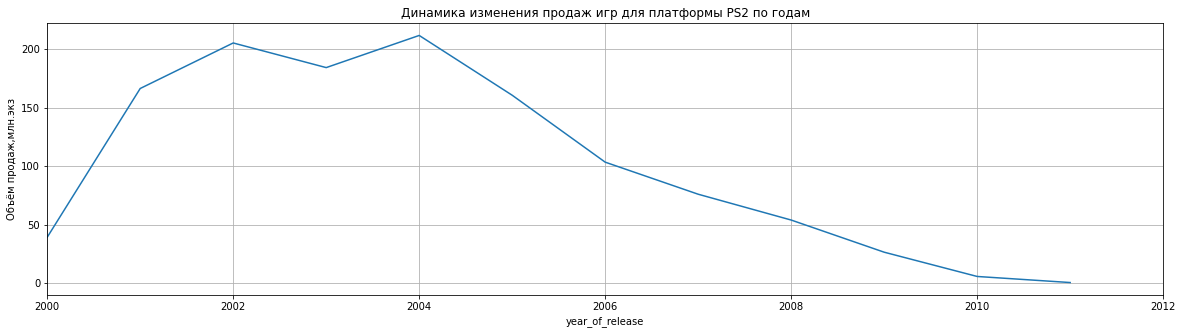

In [62]:
ps2_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (2000,2012), grid = True, \
               title = 'Динамика изменения продаж игр для платформы PS2 по годам', figsize = (20,5),
              ylabel = 'Объём продаж,млн.экз');

Ага,период с 2000 года по 2006 год был очень удачным для PS2.

Теперь игровая платформа X360:

In [63]:
x360 = data.query('platform == "X360" and year_of_release > 2004')

x360_year = x360.groupby(by = 'year_of_release')['sale_sum'].sum()

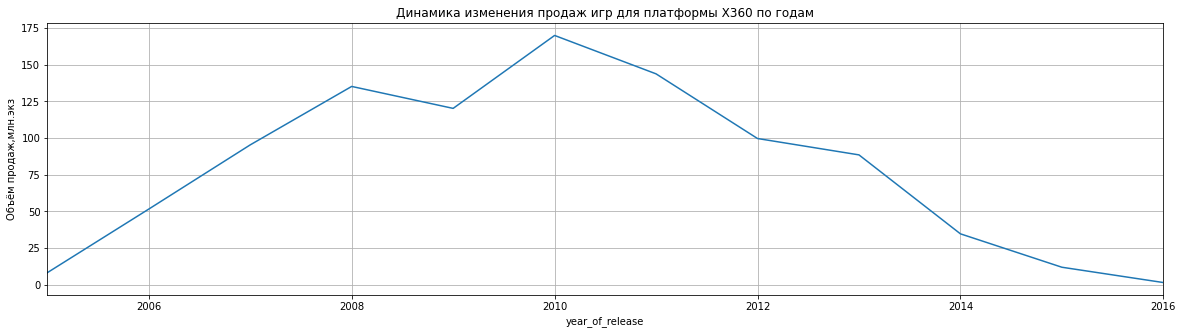

In [64]:
x360_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (2005,2016), grid = True, \
               title = 'Динамика изменения продаж игр для платформы X360 по годам', figsize = (20,5),
               ylabel = 'Объём продаж,млн.экз');

А вот с 2006 года пальму первенства у PS2 перехватила игровая платформа X360, но и она с 2014 года потеряла лидирующие позиции.

Посмотрим бронзового призера игровых платформ - PS3:

In [65]:
ps3 = data.query('platform == "PS3"')

ps3_year = ps3.groupby(by = 'year_of_release')['sale_sum'].sum()

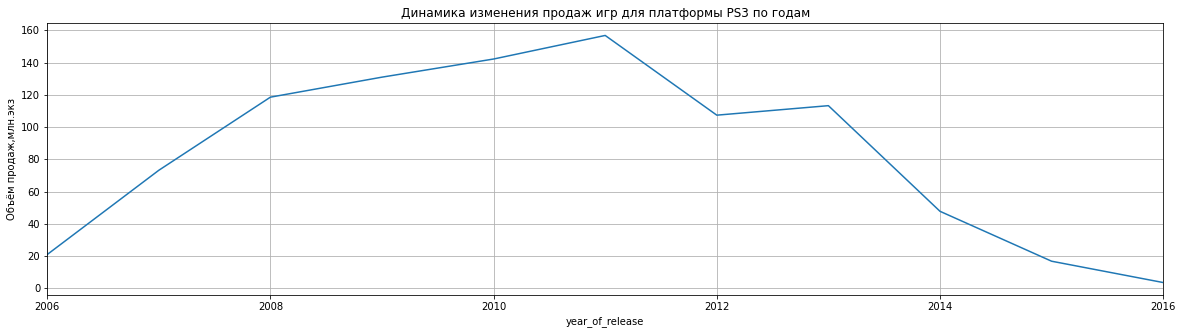

In [66]:
ps3_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (2006,2016), grid = True, \
               title = 'Динамика изменения продаж игр для платформы PS3 по годам', figsize = (20,5),
              ylabel = 'Объём продаж,млн.экз');

Но Sony(PS3), не осталась в долгу и с 2006 года поделила почти поровну рынок с Microsoft (X360). Но с 2014 года так же продажи начали падать.

А что произошло на рынке с играми для Nintendo(Wii)?

In [67]:
wii = data.query('platform == "Wii" and year_of_release > 2005')

wii_year = wii.groupby(by = 'year_of_release')['sale_sum'].sum()

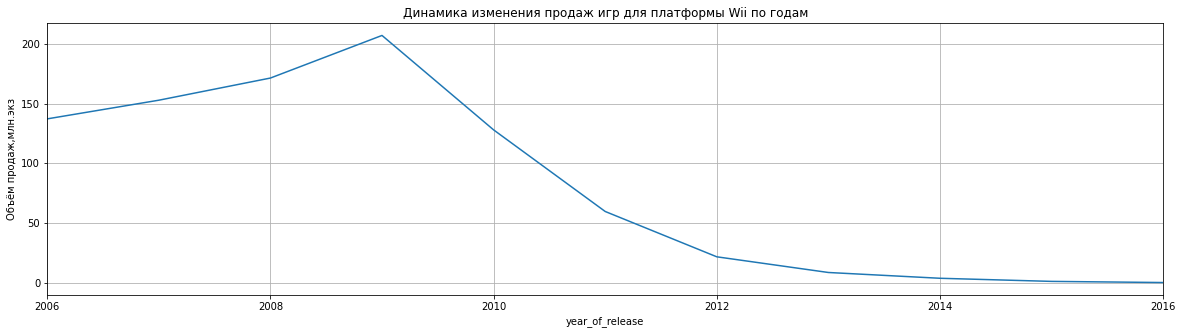

In [69]:
wii_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (2006,2016), grid = True, \
               title = 'Динамика изменения продаж игр для платформы Wii по годам', figsize = (20,5),
             ylabel = 'Объём продаж,млн.экз');

В период с 2006 года по 2011 года отметился резкий рост продаж игр на платформе Wii(Nintendo),но хотя и максимум продаж был выше чем у Sony и Microsoft, но доходный период был короче, после 2010 года начался резкий спад продаж и в 2014 году они упали почти до 0.

Рассмотрим 5-ю строчку рейтинга- игровая платформа DS (Nintendo):

In [70]:
ds = data.query('platform == "DS" and year_of_release > 2003')

ds_year = ds.groupby(by = 'year_of_release')['sale_sum'].sum()

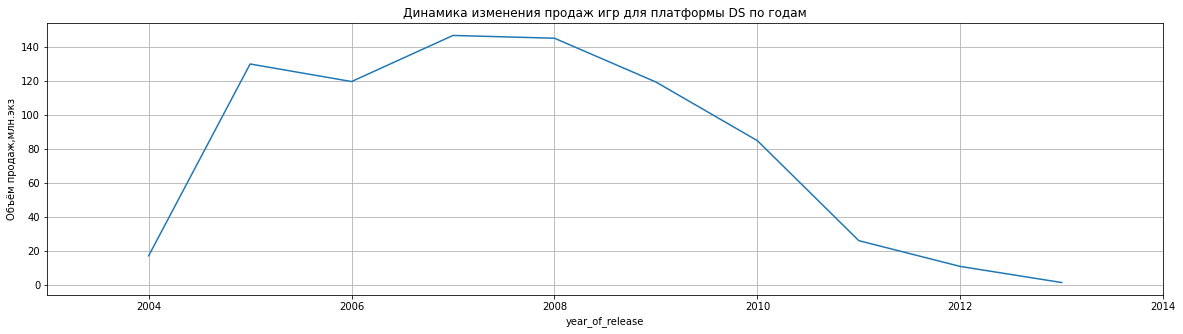

In [74]:
ds_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (2003,2014), grid = True, \
               title = 'Динамика изменения продаж игр для платформы DS по годам', figsize = (20,5),
            ylabel = 'Объём продаж,млн.экз');

На 5 месте рейтинга опять Nintendo со своей портативной консолью DS.Резкий захват рынка с 2004 года и такой же резкий спад начиная с 2010 года, максимум сопоставим с лидерами рейтинга (PS2,PS3 и X360).

И замыкает шестерку лидеров игровая платформа PS (первая ласточка с семействе игровых консолей Play Station):

In [75]:
ps = data.query('platform == "PS" and year_of_release > 1994')

ps_year = ps.groupby(by = 'year_of_release')['sale_sum'].sum()

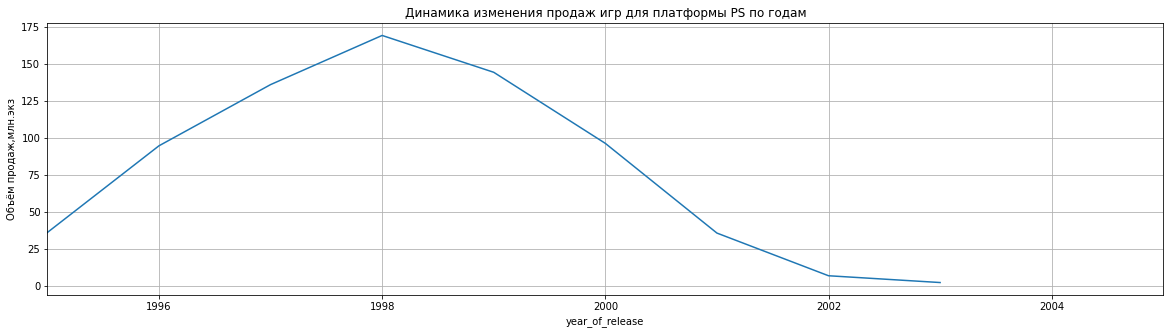

In [76]:
ps_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (1995,2005),grid = True,
             title = 'Динамика изменения продаж игр для платформы PS по годам', figsize = (20,5),
            ylabel = 'Объём продаж,млн.экз');

Плавный стабильный рост продаж игр для PS с 1994 года по 1998 год и с 1998 года такой же плавный спад до 2002 года. Максимум продаж в 1998 году почти 175 млн игр для платформы PS.

Посмотрим за какой характерный срок появляются новые и исчезают старые платформы?

По найденым выше зависимостям можно сказать, что в среднем продолжительность жизни каждой платформы составляет около 8 лет.Период расцвета приходится на 4 год. Предположу, что новая платформа позволяет вывести игры на качественно новый уровень, что подогревает интерес геймеров и начинается рост продаж игр новой платформы. Вероятно, резкого всплеска продаж с появлением новинок не происходит, так как сами игровые приставки стоят не дешево, и должно пройти некоторое время, чтобы произошла замена у пользователей. Обычно игры, выпущенные для новой игроой платформы не совместимы с предыдущими версиями, поэтому необходимо некоторое время, чтобы набрать популярность на рынке игр.

Теперь выберем, на основе полученных зависимостей, данные, которые можно будет использовать для формирования прогноза на рынке игр на будущий год. 
По построенным графикам мы предположили,что расцвет популярности игры приходится в среднем на 4 год продаж.
Логично предположить, что в предстоящем году на рынке будут популярны игры, у которых будущий год будет 3-4 с момента выпуска игровой платформы.
Чтобы лучше оценить динамику роста популярности лучше посмотреть чуть больший период. Поэтому посмотрим период за 4 года до 2017 года.

Возьмём данные за соответствующий актуальный период.

Отсортируем данные из таблицы за период с 2013 года по 2016 год.

In [77]:
forecast_2017 = data.query('year_of_release >= 2013')

In [78]:
forecast_2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     2233 non-null   float64
 9   user_score       2233 non-null   float64
 10  rating           2233 non-null   object 
 11  sale_sum         2233 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 226.8+ KB


Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


Построим графики изменения суммарных продаж игр по годам актуального периода для каждой игровой платформы.

In [79]:
forecast_2017['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

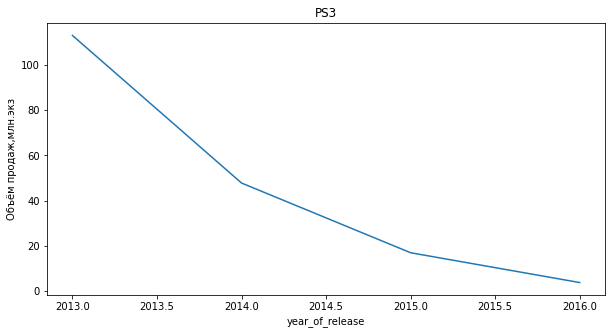

In [81]:
(forecast_2017.query('platform == "PS3"').groupby(by = 'year_of_release')['sale_sum'].sum()
 .plot(figsize = (10,5), title = "PS3",ylabel = 'Объём продаж,млн.экз'));

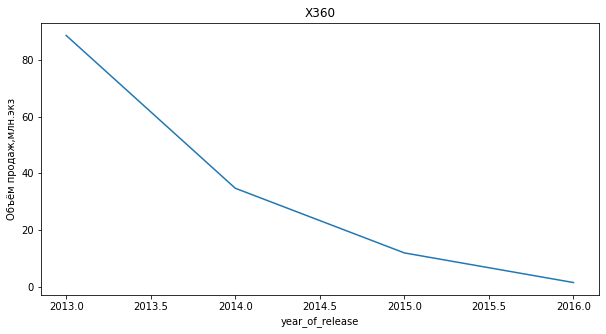

In [82]:
(forecast_2017.query('platform == "X360"').groupby(by = 'year_of_release')['sale_sum'].sum()
 .plot(figsize = (10,5),title = "X360",ylabel = 'Объём продаж,млн.экз'));

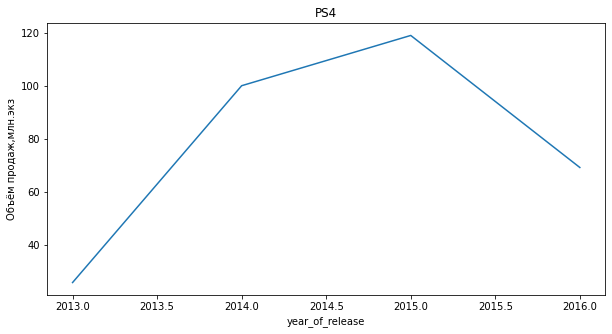

In [83]:
(forecast_2017.query('platform == "PS4"').groupby(by = 'year_of_release')['sale_sum'].sum()
 .plot(figsize = (10,5),title = "PS4",ylabel = 'Объём продаж,млн.экз'));

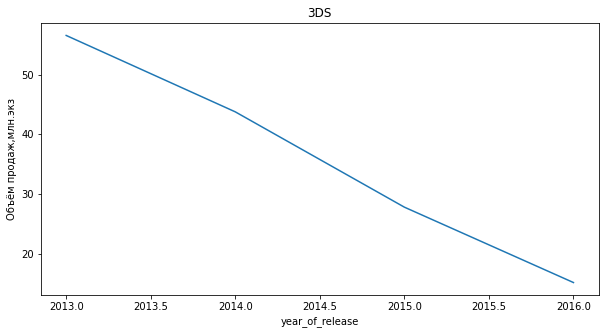

In [84]:
(forecast_2017.query('platform == "3DS"').groupby(by = 'year_of_release')['sale_sum'].sum()
 .plot(figsize = (10,5),title = "3DS",ylabel = 'Объём продаж,млн.экз'));

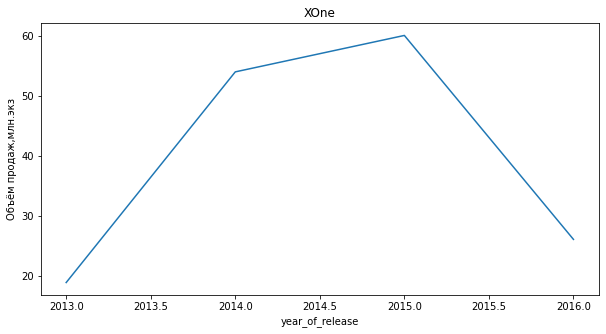

In [85]:
(forecast_2017.query('platform == "XOne"').groupby(by = 'year_of_release')['sale_sum'].sum()
 .plot(figsize = (10,5),title = "XOne",ylabel = 'Объём продаж,млн.экз'));

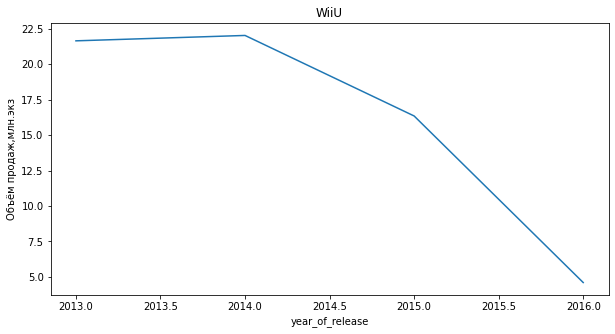

In [86]:
(forecast_2017.query('platform == "WiiU"').groupby(by = 'year_of_release')['sale_sum'].sum()
 .plot(figsize = (10,5),title = "WiiU",ylabel = 'Объём продаж,млн.экз'));

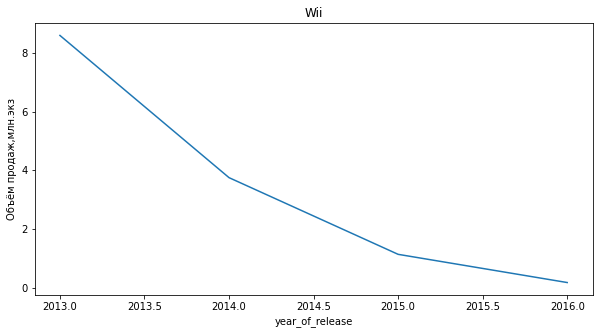

In [87]:
(forecast_2017.query('platform == "Wii"').groupby(by = 'year_of_release')['sale_sum'].sum()
 .plot(figsize = (10,5),title = "Wii",ylabel = 'Объём продаж,млн.экз'));

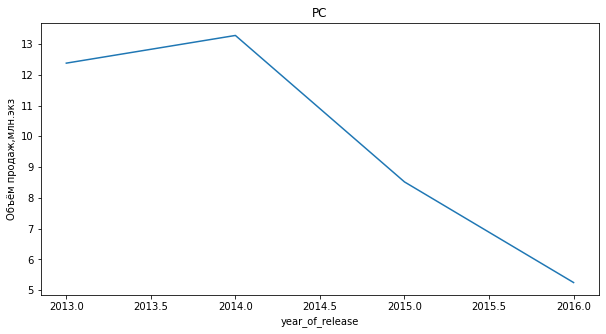

In [88]:
(forecast_2017.query('platform == "PC"').groupby(by = 'year_of_release')['sale_sum'].sum()
 .plot(figsize = (10,5),title = "PC",ylabel = 'Объём продаж,млн.экз'));

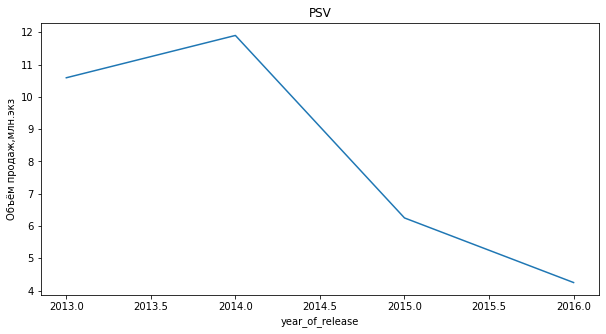

In [89]:
(forecast_2017.query('platform == "PSV"').groupby(by = 'year_of_release')['sale_sum'].sum()
 .plot(figsize = (10,5), title = "PSV",ylabel = 'Объём продаж,млн.экз'));

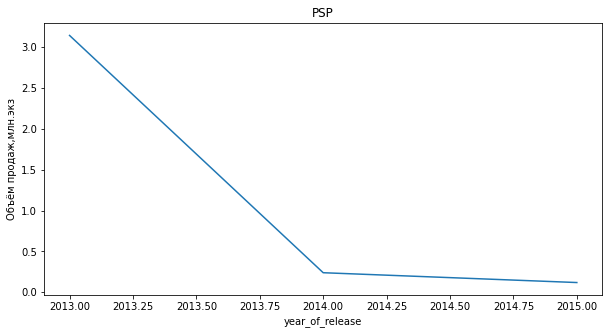

In [90]:
(forecast_2017.query('platform == "PSP"').groupby(by = 'year_of_release')['sale_sum'].sum()
 .plot(figsize = (10,5),title = "PSP",ylabel = 'Объём продаж,млн.экз'));

In [ ]:
(forecast_2017
 .pivot_table(index = 'year_of_release', columns = 'platform', values = 'sale_sum', aggfunc = sum))

Ни одна из представленных в датафрейме игровых платформ не находится в зоне роста в 2016 году. Но игровые платформы PS4 и XOne и даже 3DS, всё еще продают несколько десятков миллионов копий в год. Можно взять их в качестве флагманов игрового рынка (в пределах данного датасета).
Судя по тому, что продажи всех представленных игровых платформ находятся в зоне снижения продаж, есть основания предполагать, что в новом году может быть объявлено о появлении новых игровых платформ, которые в ближайшие 3-4 года потенциально могут начать захватывать игровой рынок. 
Стоит поискать информацию о скорых релизах и изучить их повнимательней. Но если говорить о прогнозах на 2017 год, то скорее всего основной сегмент рынка будет за PS4, XOne и 3DS.

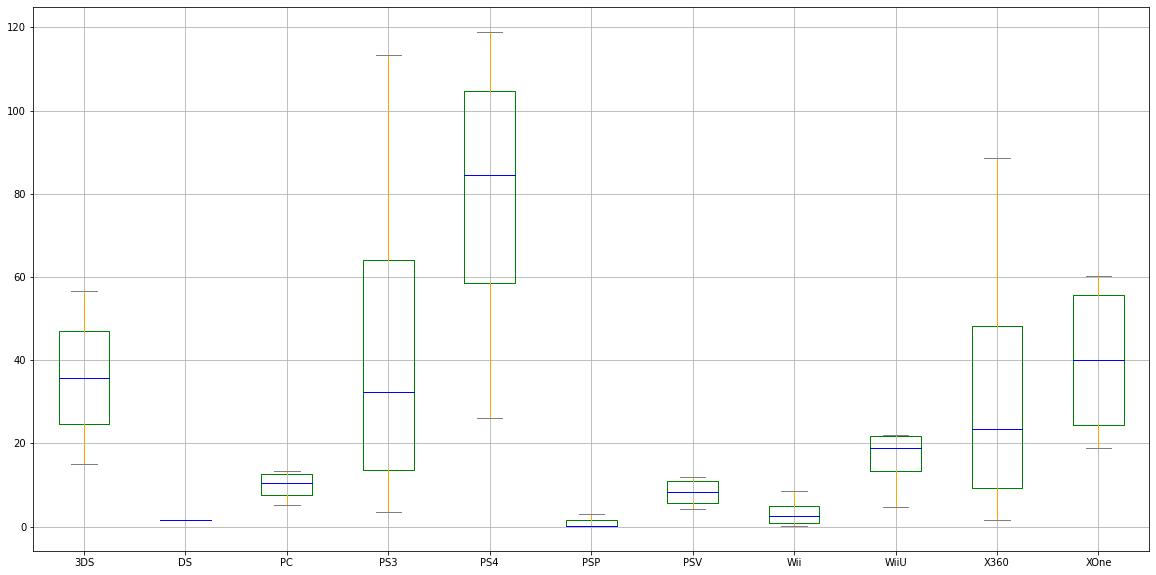

In [98]:
(
    forecast_2017.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sale_sum', aggfunc = sum)
    .boxplot(grid = "True", figsize = (20,10),
             color = {"boxes": "Green","whiskers": "Orange","medians": "Blue","caps": "Gray"})
    );


 Картина на диаграмме разброса показывает, что игровые платформы Sony, PS3 и PS4, принесли своим разработчикам самую большие продажи игр за анализируемый период, количество проданных игр для PS3 в основной массе лежит в диапазоне 15-65 млн копий, медианное значение расположено в районе 35 млн копий. Но,похоже, что PS4 пользовалась большей популярностью, в среднем от 59 до 115 млн копий с медианой около 85 млн. копий. 
 Следующей по популярности идут игровые платформы Microsoft, X360 и XOne,XOne оказалась несколько популярней X360, количество проданных копий больше и медианное значение лежит выше, но для X360 тоже были минуты славы усы диаграммы тянутся аж до 90 млн. копий.
 На третье место можно поставить платформу 3DS (Nintendo) её продажи сконцентрировались в области 25-48 млн копий, особенно больших скачков не отмечалось, медианные значения в районе 35 млн копий.
 Платформы PC,PSV, WiiU расположились в зоне 20 млн проданных копий - 4-е место в рейтинге.
 Платформы DS,PSP,Wii не преодолели барьер и в 15 млн проданных копий, разместим их на 5-м месте по популярности, расцвет DS не попал на выбранные годы.

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Теперь посмотрим, как влияют на продажи внутри популярной платформы PS4 отзывы пользователей и критиков.

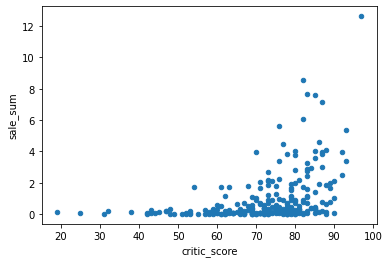

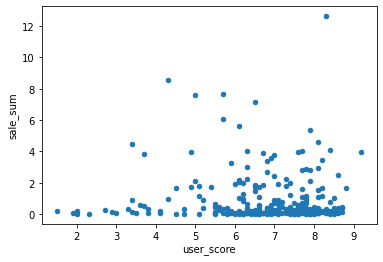

In [99]:
(
    forecast_2017.query('platform =="PS4" and critic_score != 0')
    .plot(x = "critic_score", y = "sale_sum", kind = "scatter")
);
(
    forecast_2017.query('platform =="PS4"and user_score != 0')
    .plot(x = "user_score", y = "sale_sum", kind = "scatter")
);

Рассчитаем коэффициент корелляции между суммарными продажами PS4 и оценкой критиков и пользователей,из расчета уберём нулевые значения, так как ими мы заменили пропуски:

In [100]:
corr_ps4 = forecast_2017.query('platform =="PS4" and critic_score > 0 and user_score > 0')

print(corr_ps4['critic_score'].corr(corr_ps4['sale_sum']))

corr_ps4['user_score'].corr(corr_ps4['sale_sum'])

0.40589480145836687


-0.03362497596528878

### Соотнесем выводы с продажами игр на других платформах.

Теперь посмотрим, как влияют на продажи внутри популярной платформы PS3 отзывы пользователей и критиков.

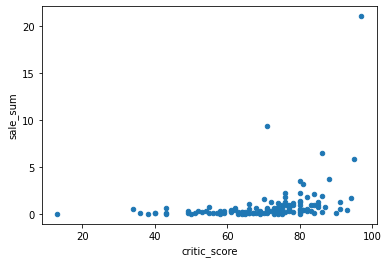

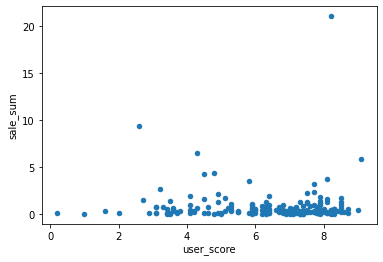

In [101]:
(
    forecast_2017.query('platform =="PS3"and critic_score != 0')
    .plot(x = "critic_score", y = "sale_sum", kind = "scatter")
);

(
    forecast_2017.query('platform =="PS3"and user_score != 0')
    .plot(x = "user_score", y = "sale_sum", kind = "scatter")
);


Рассчитаем коэффициент корелляции между суммарными продажами игровой платформы PS3 и оценкой критиков и пользователей, из расчета уберём нулевые значения, так как ими мы заменили пропуски:

In [102]:
corr_ps3 = forecast_2017.query('platform =="PS3" and critic_score > 0 and user_score >0')

print(corr_ps3['critic_score'].corr(corr_ps3['sale_sum']))

corr_ps3['user_score'].corr(corr_ps3['sale_sum'])

0.33380663565061736


0.02269094327112414

Теперь посмотрим, как влияют на продажи внутри популярной платформы XOne отзывы пользователей и критиков.

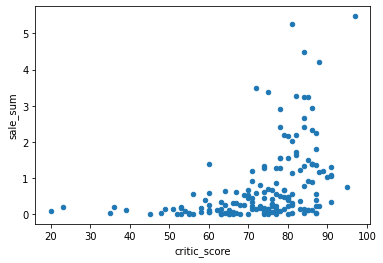

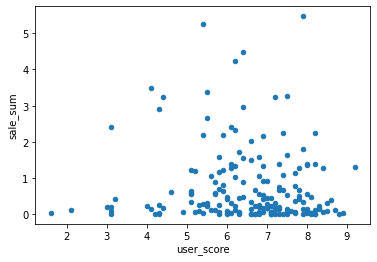

In [103]:
(
    forecast_2017.query('platform =="XOne"and critic_score != 0')
    .plot(x = "critic_score", y = "sale_sum", kind = "scatter")
);
(
    forecast_2017.query('platform =="XOne"and user_score != 0')
    .plot(x = "user_score", y = "sale_sum", kind = "scatter")
);

Рассчитаем коэффициент корелляции между суммарными продажами XOne и оценкой критиков и пользователей,из расчета уберём нулевые значения, так как ими мы заменили пропуски:

In [104]:
corr_xone = forecast_2017.query('platform =="XOne" and critic_score > 0 and user_score >0')

print(corr_xone['critic_score'].corr(corr_xone['sale_sum']))

corr_xone['user_score'].corr(corr_xone['sale_sum'])

0.41042203561296375


-0.09400318326920852

Посмотрим на зависимость продаж игровой платформы 3DS от оценок пользователей и критиков.

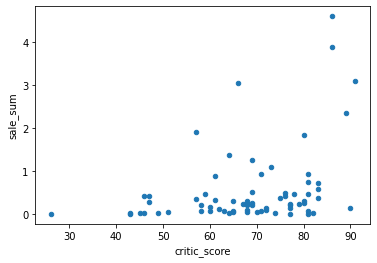

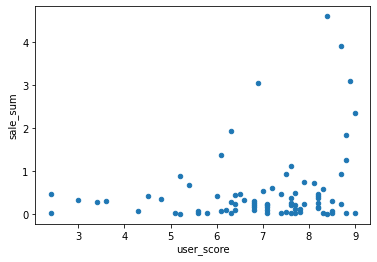

In [105]:
(
    forecast_2017.query('platform =="3DS"and critic_score != 0')
    .plot(x = "critic_score", y = "sale_sum", kind = "scatter")
);
(
    forecast_2017.query('platform =="3DS"and user_score != 0')
    .plot(x = "user_score", y = "sale_sum", kind = "scatter")
);

Рассчитаем коэффициент корелляции между суммарными продажами 3DS и оценкой критиков и пользователей, из расчета уберём нулевые значения, так как ими мы заменили пропуски:

In [106]:
corr_3ds = forecast_2017.query('platform =="3DS" and critic_score > 0 and user_score >0')

print(corr_3ds['critic_score'].corr(corr_3ds['sale_sum']))

corr_3ds['user_score'].corr(corr_3ds['sale_sum'])

0.3392349287853147


0.2729904366942444

Оценив корелляцию между суммарными продажами игр самых успешных платформ и оценкой критиков и пользователей получили следующие значения.

In [107]:

data1 = [
    ["critic_score", 0.405, 0.330, 0.41, 0.34],
    ["user_score", -0.33, 0.022, -0.094, 0.27]
]
columns1 = ["score", "PS4", "PS3","XOne", "3DS"]
sale_score = pd.DataFrame(data = data1, columns = columns1)


In [108]:
display(sale_score)

,score,PS4,PS3,XOne,3DS
0,critic_score,0.405,0.330,0.410,0.34
1,user_score,-0.330,0.022,-0.094,0.27


Полученные коэффициенты указывают о наличии слабой линейной зависимости между ростом продаж и ростом оценки критиков, оценки пользователей не имеют линейной связи с значениями суммарных продаж.

### Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

А теперь посмотрим как распределяются игры по жанрам. 


Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

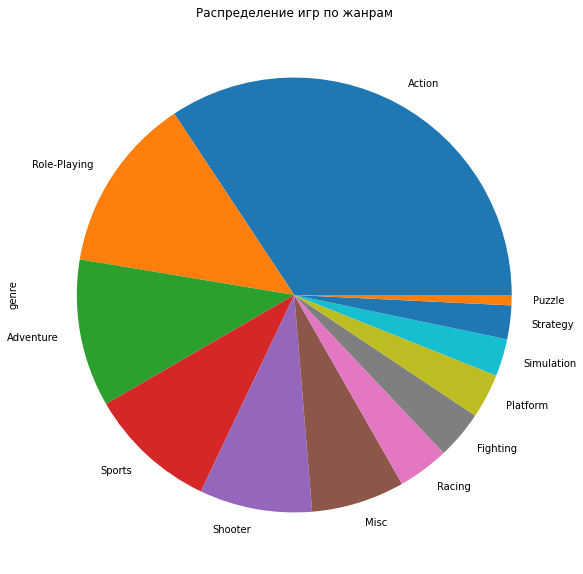

In [109]:
display(forecast_2017['genre'].value_counts())
forecast_2017['genre'].value_counts().plot(kind='pie', title = 'Распределение игр по жанрам', figsize = (10,10));

Жанр Action впереди планеты всей, Role-Playing, Adventure, Sports, Shooter и Misc занимают практически равные доли датафрейма,
самые непопулярные:Racing,Fighting,Platform,Simulation,Strategy,Puzzle.

Изучим какие жанры игр продаются лучше всего. Выделяются ли жанры с высокими и низкими продажами?

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: sale_sum, dtype: float64

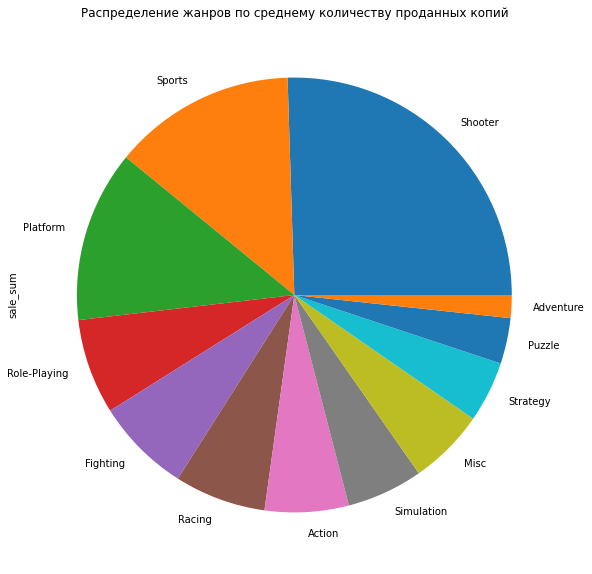

In [110]:
display(forecast_2017.groupby(by = "genre")['sale_sum'].median().sort_values(ascending = False))

(
    forecast_2017.groupby(by = "genre")['sale_sum'].median()
    .sort_values(ascending = False)
    .plot(kind='pie', title = 'Распределение жанров по среднему количеству проданных копий',figsize = (10,10))
);

По среднему количеству проданных копий самым продаваемым оказался жанр Shooter.

На втором месте близко расположились жанры Sports и Platform. 

Третье место поделили: Role-Playing, Fighting, Racing 

Четвертое место делят: Action, Simulation, Misc, Strategy 

Ну и в хвосте рейтинга: Puzzle, Adventure 

Интересно отметить тот факт, что самым популярным жанром игры в датасете был Action, а вот по среднему(медианному) количеству проданных копий оказался, всего лишь на третьем, да и то не один, следующий по популярности жанры Role-Playing и Adventure вообще по среднему количеству копий переместились на 3 и 5 место, соответственно. А жанры Sports и  Shooter переехали по среднему количеству проданных копий на 1-е и 2-е место. И бедный на разнообразие игр Platform занял почетное второе место по среднему количеству проданных копий.
Да, не всегда количество переходит в качество.

 ## Составим портрет пользователя каждого региона

### Посмотрим и сравним топ-5 платформ для 3-х регионов: NA(Северная Америка), EU(Европа) и JP(Япония).

Самые популярные платформы (топ-5):

Для региона Северная Америка (NA):

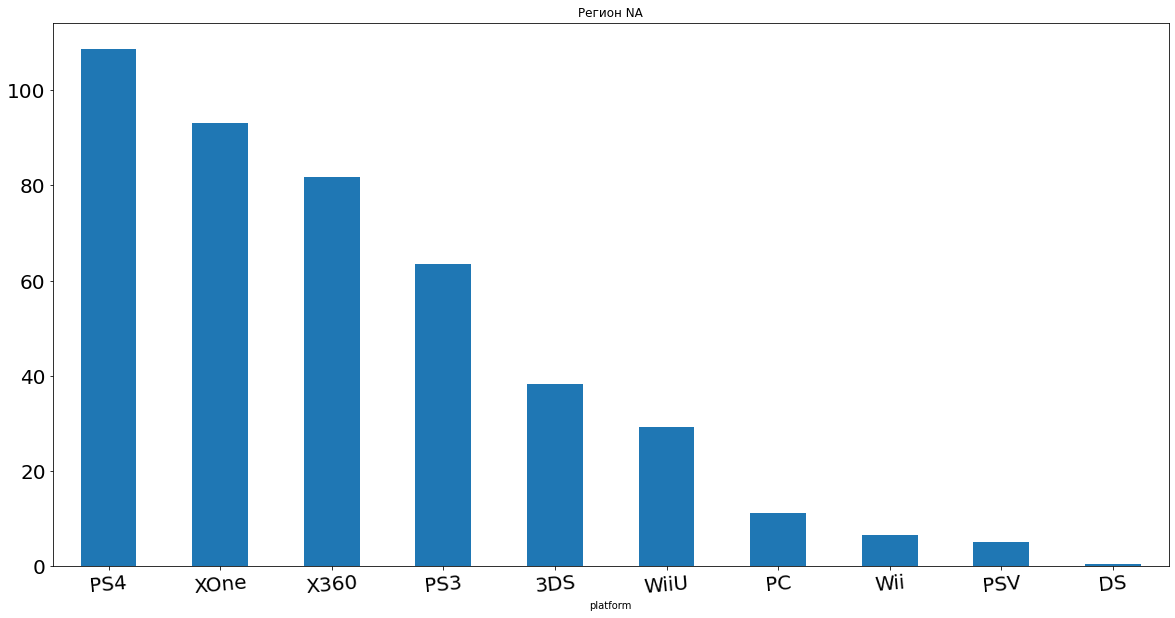

In [111]:
(forecast_2017.query('na_sales != 0')
 .groupby(by = "platform")['na_sales'].sum().sort_values(ascending = False)
.plot(x = "platform",kind="bar",rot=5, fontsize=20, figsize = (20,10), title = 'Регион NA'));

Для региона Европа (EU):

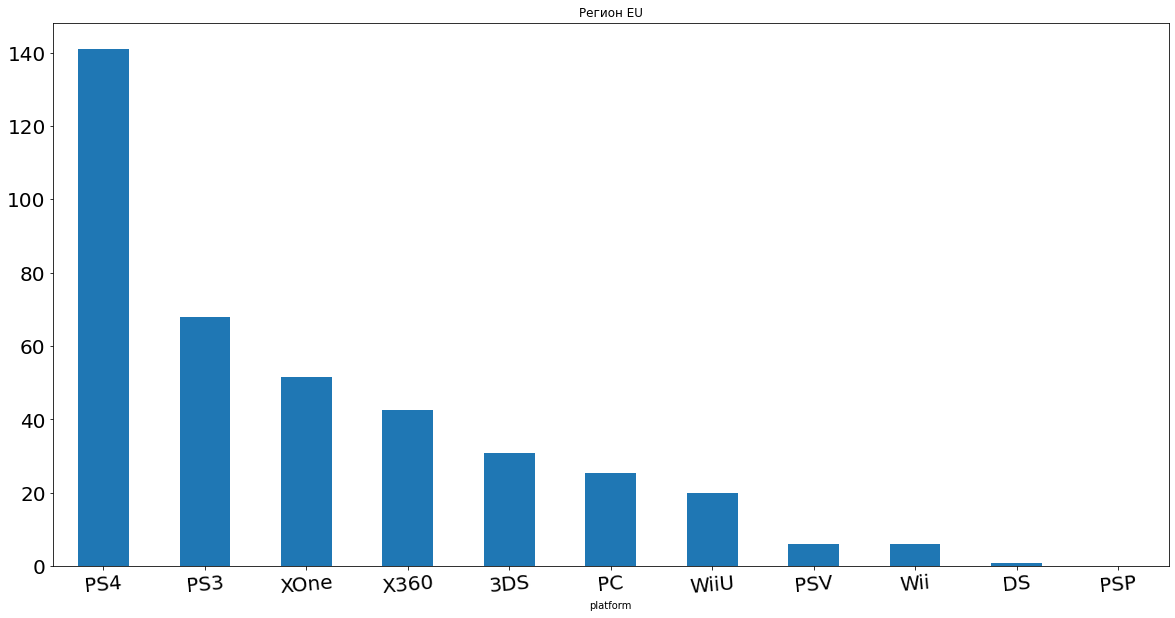

In [112]:
(forecast_2017.query('eu_sales != 0')
 .groupby(by = "platform")['eu_sales'].sum().sort_values(ascending = False)
 .plot(x = "platform",kind="bar",rot=5, fontsize=20, figsize = (20,10),title = 'Регион EU'));


Для региона Япония (JP):

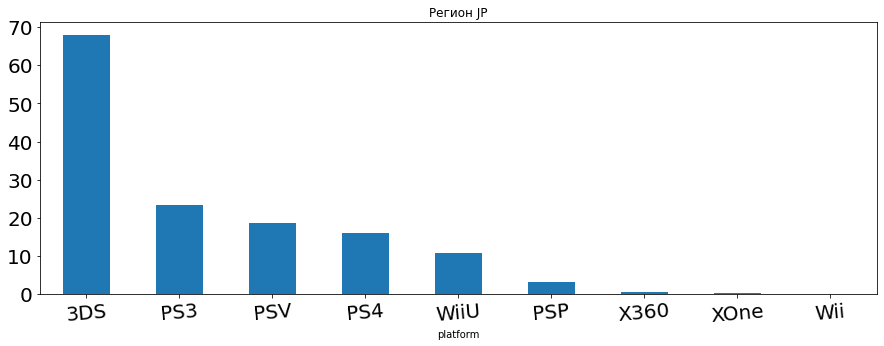

In [113]:
(forecast_2017.query('jp_sales != 0')
 .groupby(by = "platform")['jp_sales'].sum().sort_values(ascending = False)
 .plot(x = "platform",kind="bar",rot=5, fontsize=20, figsize = (15,5),title = 'Регион JP'));

In [114]:
data2 = [
    ["1_st_place", "PS4", "PS4", "3DS"],
    ["2_nd_place", "XOne", "PS3", "PS3"],
    ["3_rd_place", "X360", "XOne", "PSV"],
    ["4_th_place", "PS3", "X360", "PS4"],
    ["5_th_place", "3DS", "3DS", "WiiU"]
]
columns2 = ["place", "NA", "EU","JP"]
reiting_platform_reg = pd.DataFrame(data = data2, columns = columns2)


In [115]:
display(reiting_platform_reg)

,place,NA,EU,JP
0,1_st_place,PS4,PS4,3DS
1,2_nd_place,XOne,PS3,PS3
2,3_rd_place,X360,XOne,PSV
3,4_th_place,PS3,X360,PS4
4,5_th_place,3DS,3DS,WiiU


Изучив рейтинг топ-5 игровых платформ в различном регионе можно увидеть логичное распределение лидеров:
Япония предпочитает игровые платформы японского происхождения, а вот жители региона Северная Америка и Евросоюза близки в культурном отношении между собой и выбирают лидером продукт американской компании SONY -  игровую платформу PS4. Но в Европейском регионе PS4 имеет ощутимый отрыв от платформ,стоящих на более низких позициях рейтинга. А вот в странах Северной Америки позиции XOne и X360 дышат в спину PS4. Японские игровые платформы замыкают топ-5 для Северной Америки и Евросоюза.
Все логично, эндемичные компании выпускают игры с учетом приоритетов и национальных особенностей своего региона, что может объяснить такое различие в рейтингах по регионам.

### Самые популярные жанры (топ-5). 

2.Самые популярные жанры (топ-5):

Для региона NA (Северная Америка):

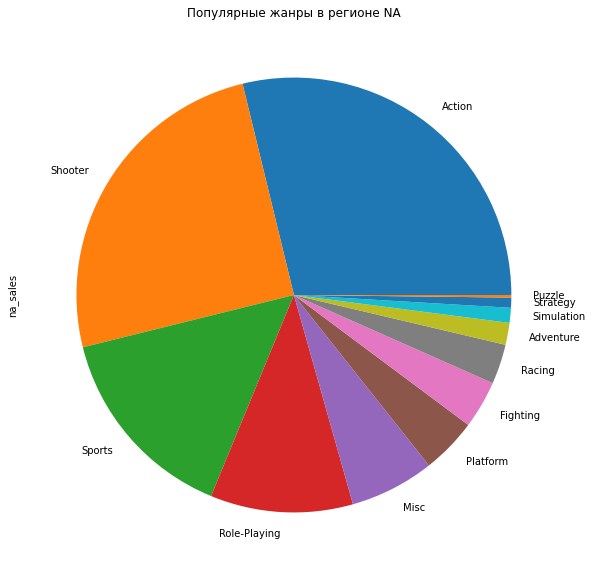

In [116]:
(forecast_2017.groupby(by = "genre")['na_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Популярные жанры в регионе NA',figsize = (10,10))
);

Для региона EU (Евросоюз):

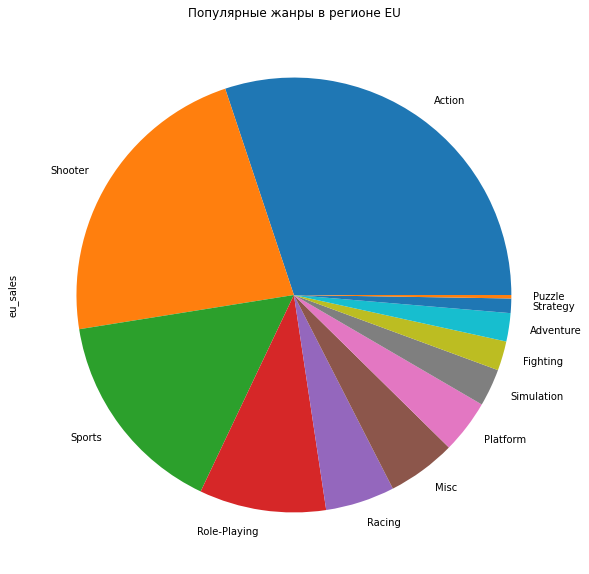

In [117]:
(forecast_2017.groupby(by = "genre")['eu_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Популярные жанры в регионе EU',figsize = (10,10))
);

Для региона JP (Япония):

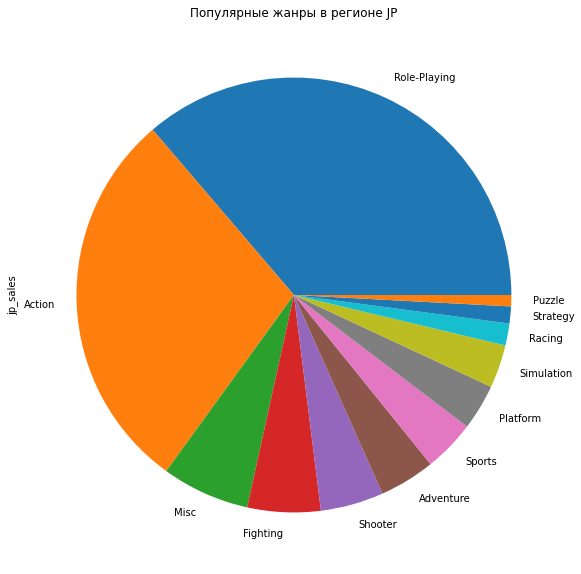

In [118]:
(forecast_2017.groupby(by = "genre")['jp_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Популярные жанры в регионе JP',figsize = (10,10))
);

In [119]:
data3 = [
    ["1_st_place", "Action", "Action", "Role-Playing"],
    ["2_nd_place", "Shooter", "Shooter", "Action"],
    ["3_rd_place", "Sports", "Sports", "Misc"],
    ["4_th_place", "Role-Playing", "Role-Playing", "Fighting"],
    ["5_th_place", "Misc", "Racing", "Shooter"]
]
columns3 = ["place", "NA", "EU","JP"]
reiting_genre_reg = pd.DataFrame(data = data3, columns = columns3)


In [120]:
display(reiting_genre_reg)

,place,NA,EU,JP
0,1_st_place,Action,Action,Role-Playing
1,2_nd_place,Shooter,Shooter,Action
2,3_rd_place,Sports,Sports,Misc
3,4_th_place,Role-Playing,Role-Playing,Fighting
4,5_th_place,Misc,Racing,Shooter


Распределение жанровых предпочтений в рейтинге тоже вполне объяснимо различиями в культуре представленных регионов. 
В Японии лидируют Role-Playing и Action (почти на одном уровне по количеству проданных копий игр), затем идет смешаный жанр misc, Fighting и Shooter(близки по количеству проданных копий).
В регионе NA первую позицию занимает жанр Action, но продажи Shooter не сильно от него отстают. Жанры Sports, Role-Playing и misc близки по количеству проданных копий и расположились на последних 3-х ступенях рейтинга.
Регион EU отличается уверенным лидирством жанра Action. Затем с небольшим разрывом 2-е и третье место за Shooter и Sports.
Замыкают рейтинг Role-Playing и Racing (количества проданных копий также близки).

### Разберемся как рейтинг ESRB влияет на продажи в отдельном регионе?

Для региона NA:

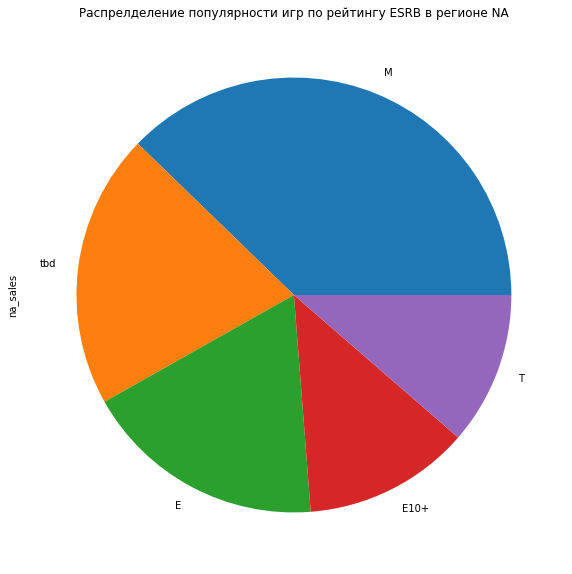

In [121]:
(forecast_2017.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Распрелделение популярности игр по рейтингу ESRB в регионе NA',figsize = (10,10))
);

Для региона EU:

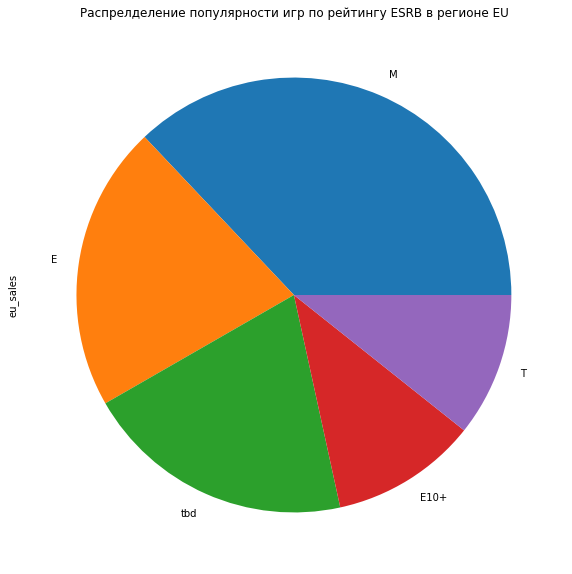

In [122]:
(forecast_2017.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Распрелделение популярности игр по рейтингу ESRB в регионе EU',figsize = (10,10))
);

Для региона JP:

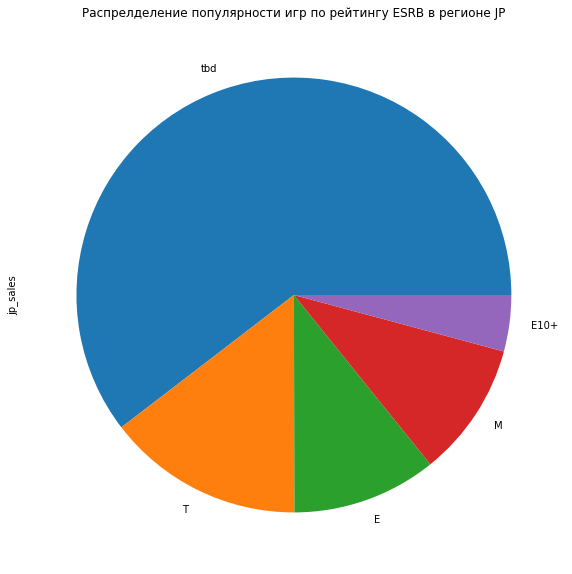

In [123]:
(forecast_2017.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Распрелделение популярности игр по рейтингу ESRB в регионе JP',figsize = (10,10))
);

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Логично предположить, что рейтинги этой организации будут близки регионам NA и EU.
В регионах NA и EU топ-5 рейтинга ESRB схожи друг с другом: лидируют игры с рейтингом «M» («Mature») — «Для взрослых», на втором месте расположились таинственные "tbd"(пропуск в данных) и  «E» («Everyone») — «Для всех», третье место за «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» и последнее место за «T» («Teen») — «Подросткам». 

А что с регионом JP? Возможно, американская классификация не очень близка японцам, но по данным датафрейма на первом месте стоят игры с пропущенным значением рейтинга, и первое место существенно опережает всех остальных, на втором месте игры с рейтингом «T» («Teen») — «Подросткам», на третьем: «E» («Everyone») — «Для всех» и «M» («Mature») — «Для взрослых» и на последнем «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше». Предположу, что данный рейтинг для Японии не очень показателен, так как в их рейтинге платформ первое место занимает nintendo. Возможно, для внутреннего рынка они выпускают больше игр для своих платформ и категорируют их по собственным стандартам.

Необходимо отметить, что в рейтинге присутствует на втором месте (в NA) и третьем(в EU) и первом (в JP) значение рейтинга "tbd",так мы обозначили пропущенные значения. Они изначально отсутствовали в датасете в существенном объеме(более 50%). И если бы они были идентифицированы, то распределение в рейтинге могло быть иным. А в сложившейся ситуации данный показатель считаю смещенным и не информативным. Необходимо дополучить информацию по рейтингу ESRB, чтобы на его основе делать прогнозы.

## Проверка гипотез о рейтингах игр

Проверим гипотезы:

### Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Выдвигаем нулевую гипотезу 

    Н0: Средние пользовательские рейтинги платформ Xbox One и PC равны.
    Н1:Средние пользовательские рейтинги платформ Xbox One и PC не равны. 

Это двусторонняя гипотеза, так как возможно отклонение выборочного среднего от предполагаемого значения как вправо так и влево(Xbox One > PC или Xbox One < PC).

Мы проверяем гипотезу о равенстве средних двух средних при помощи t-теста, который используется для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

При выборе уровня значимости alpha исследователь исходит из условий задачи, а именно какую вероятность ошибки он считает допустимой для своего исследования.

In [124]:
data['user_score'].isna().sum()

0

In [125]:

data_xbox = data.query('platform == "XOne" and year_of_release >= 2013 and user_score != 0')
data_pc = data.query('platform == "PC" and year_of_release >= 2013 and user_score != 0')

reiting_xbox_one = data_xbox['user_score']
reiting_pc = data_pc["user_score"]

alpha = 0.05
results = st.ttest_ind(reiting_xbox_one, reiting_pc, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод:** вероятность равенства средних пользовательских рейтингов платформ Xbox One и PC > 0,05%

### **Гипотеза 2:** Средние пользовательские рейтинги жанров Action и Sports разные.

**Гипотеза 2:** Средние пользовательские рейтинги жанров Action и Sports разные.

Выдвигаем нулевую гипотезу

    Н0: Средние пользовательские рейтинги жанров Action и Sports равны.
    Н1: Средние пользовательские рейтинги жанров Action и Sports не равны. 

Это двусторонняя гипотеза, так как возможно отклонение выборочного среднего от предполагаемого значения как вправо так и влево(Action > Sports  или Action < Sports).

Мы проверяем гипотезу о равенстве средних двух средних при помощи t-теста, который используется для проверки гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

При выборе уровня значимости alpha исследователь исходит из условий задачи, а именно какую вероятность ошибки он считает допустимой для своего исследования.


In [126]:

data_action = data.query('genre == "Action" and year_of_release >= 2013 and user_score != 0')
data_sports = data.query('genre == "Sports" and year_of_release >= 2013 and user_score != 0')

user_score_action = data_action['user_score']
user_score_sports = data_sports['user_score']

alpha = 0.05
results = st.ttest_ind(user_score_action, user_score_sports, equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Отвергаем нулевую гипотезу в пользу альтернативной, которая предполагает неравенство средних пользовательских рейтингов жанров Action и Sports.

## **ОБЩИЙ ВЫВОД**

**Цель проекта:**  изучение факторов, влияющих на успешность компьютерной игры у пользователей стран Северной Америки, Японии и Европы для планирования рекламных компаний интернет-магазина компьютерных игр на предстоящий год.

**Зказчик проекта:** интернет-магазин компьютерных игр "Стримчик".

Для анализа был предоставлен датафрейм, содержащий информацию о компьютерных играх за период с 1980 года по 2016 год.

**Описание данных :** 

**Name** — название игры

**Platform** — платформа

**Year_of_Release** — год выпуска

**Genre** — жанр игры

**NA_sales** — продажи в Северной Америке (миллионы проданных копий)

**EU_sales** — продажи в Европе (миллионы проданных копий)

**JP_sales** — продажи в Японии (миллионы проданных копий)

**Other_sales**— продажи в других странах (миллионы проданных копий)

**Critic_Score** — оценка критиков (максимум 100)

**User_Score** — оценка пользователей (максимум 10)

**Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**В ходе предворительного анализа датафрейма с играми было установлено**

1. Из 16715 значений столбца "user_score" отсутствует 9126 значений, причем 6621 из них совпадают с пропущенными значениями в оценках критиков "critic_score" и рейтинге ESRB "rating". В итоге, по тем или иным причинам (вероятнее всего технического характера) в столбцах с рейтингами пользователей, критиков  отсутствует около 50% данных. 



2. Датафрейм содержит данные по играм за период с 1980 года по 2016 год. Больше всего данных представлено за период с 2006 года по 2011 год , 1980 представлен скромнее всех годов -всего 9 значений.

3. Жанры игр, представленных в датафрейме: 'Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle','Racing', 
                                      'Role-Playing', 'Shooter', 'Simulation', 'Sports','Strategy'

4. Игровые платформы : PS2, DS, PS3,  Wii,  X360,  PSP,  PS,   PC,  XB,  GBA,  GC,  3DS,  PSV,  PS4,  N64,  XOne,  SNES,  SAT, WiiU, 2600,  GB,  NES,  DC,  GEN,   NG,   SCD,  WS,   3DO,  TG16,   PCFX,  GG. 
 
5. Изучив количество выпускаемых новых игр по годам было выявлено, что с 1995 года по 2008 год наблюдается активный рост количества проданных игр, в 2008 достигает максимума и начинается спад до 2016 года, в котором количество проданных игр во всех регионах чуть превышает 100 млн экземпляров, что соответствует уровню 1996 года.
 


**ИССЛЕДОВАТЕЛЬСКИЙ АНАЛИЗ ДАННЫХ**

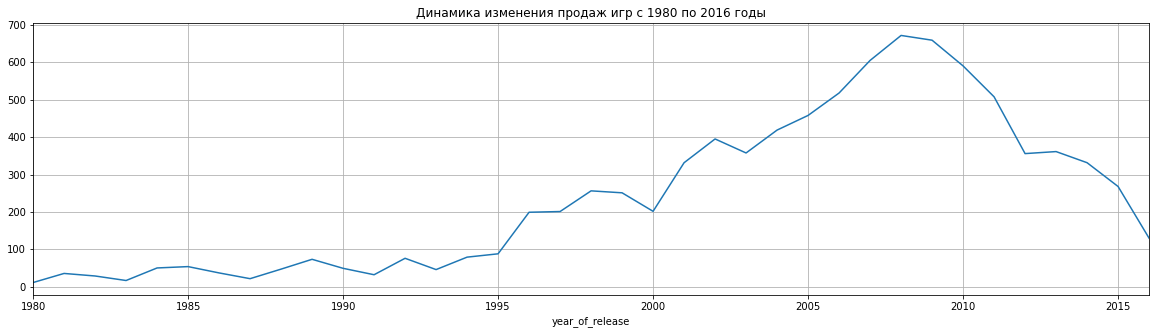

In [127]:
game_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (1980,2016), grid = True, \
               title = 'Динамика изменения продаж игр с 1980 по 2016 годы', figsize = (20,5));


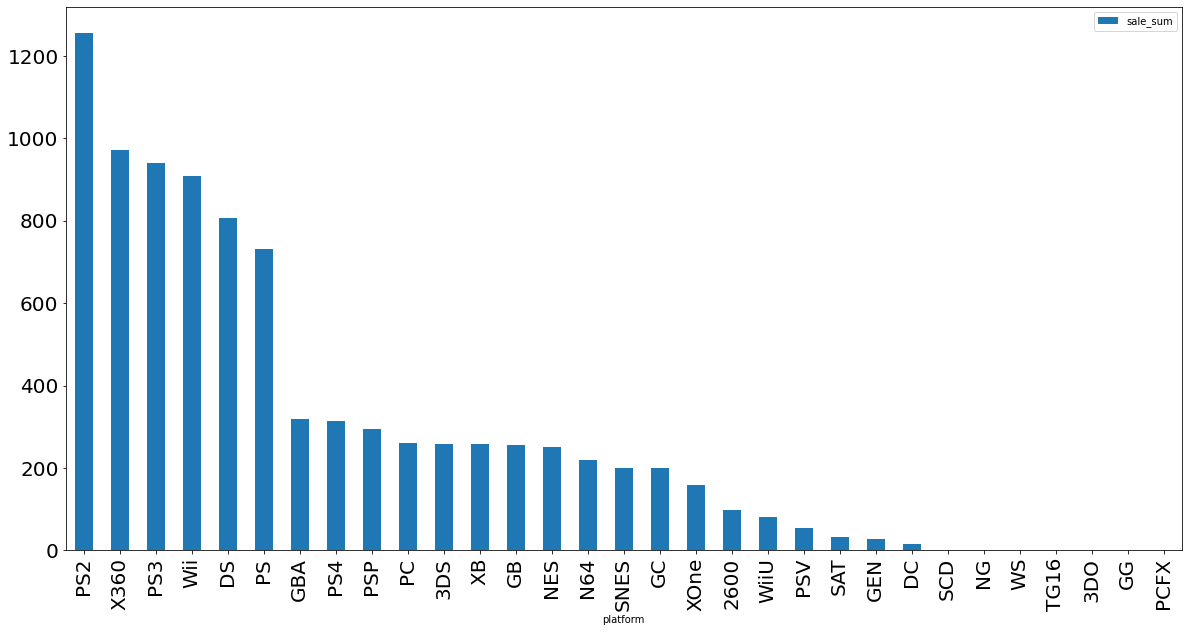

In [128]:
(data.pivot_table(index = 'platform', values = 'sale_sum', aggfunc = 'sum')
 .sort_values(by = 'sale_sum',ascending = False)
 .plot(kind="bar",rot=90, fontsize = 20, figsize = (20,10)));

Данных за 15 лет в период с 1980 года по 1995 год всего 696 значений, тогда как период с 1996 по 2015 год содержит 15739 значений. Это может свидетельствовать о слабой динамике развития игровой индустрии с 1980 год с последующим резким скачком после 1995 года, а может быть просто особенностью этого датафрейма. 
Максимум был достигнут в 2008 году, затем количество наблюдений начало снижаться. Важны ли данные за все периоды? да, важны! По ним можно проследить различные этапы развития игровой индустрии, увидеть процесс в динамике, а вот для построения прогнозов период можно выбрать наиболее подходящий для целей прогнозирования.

6. Платформы- лидеры по количеству проданных копий игр: 
                                                     PS2     1255.77  
                                                     X360     971.42  
                                                     PS3      939.65  
                                                     Wii      907.51  
                                                     DS       806.12  
                                                     PS       730.86 
                                        

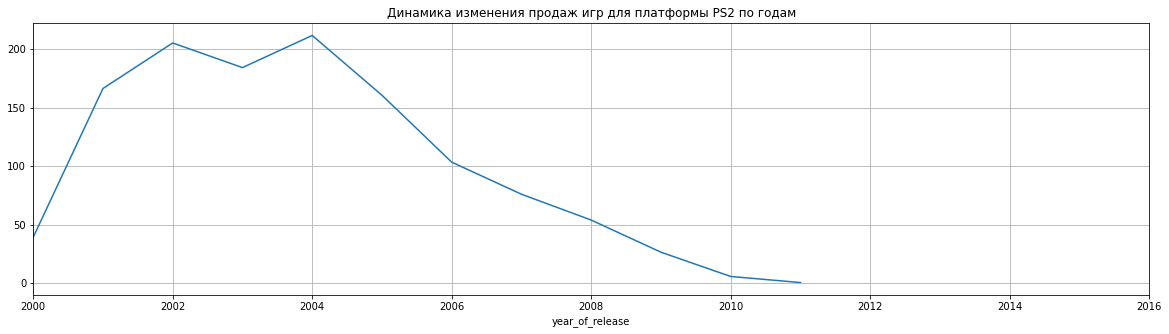

In [129]:
ps2_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (2000,2016), grid = True, \
               title = 'Динамика изменения продаж игр для платформы PS2 по годам', figsize = (20,5));

Период с 2000 года по 2006 год был очень удачным для PS2.

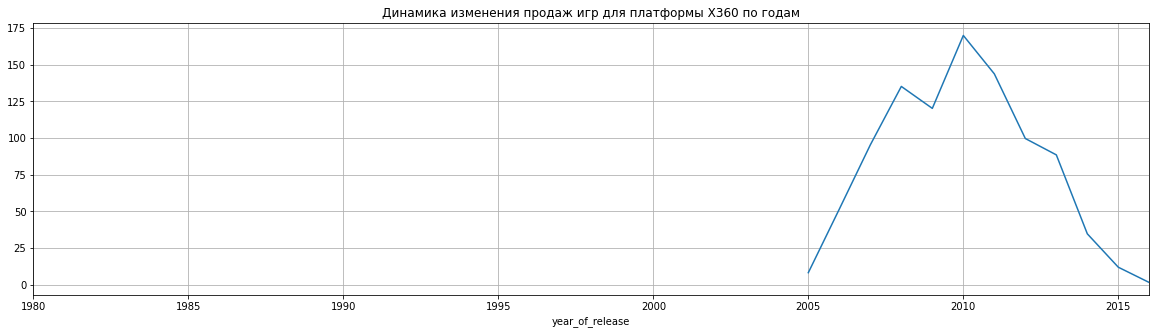

In [131]:
x360_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (1980,2016), grid = True, \
               title = 'Динамика изменения продаж игр для платформы X360 по годам', figsize = (20,5));

А вот с 2006 года пальму первенства у PS2 перехватила игровая платформа X360, но и она с 2014 года потеряла лидирующие позиции.

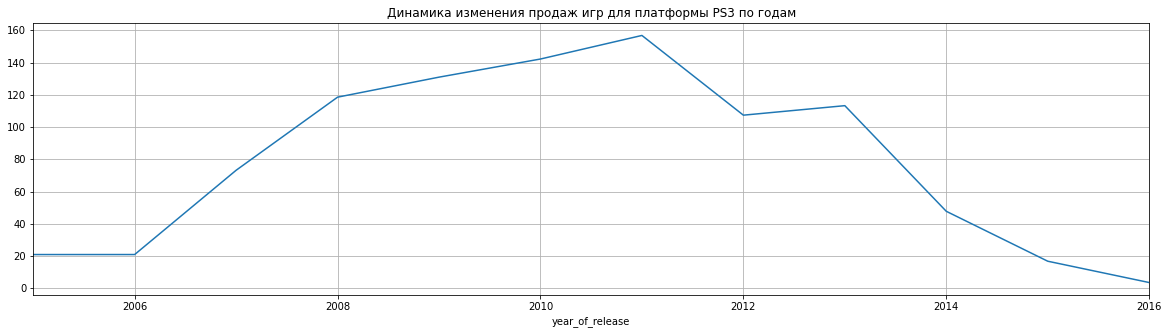

In [132]:
ps3_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (2005,2016), grid = True, \
               title = 'Динамика изменения продаж игр для платформы PS3 по годам', figsize = (20,5));

Но Sony(PS3), не осталась в долгу и с 2006 года поделила почти поровну рынок с Microsoft (X360). Но с 2014 года так же продажи начали падать.

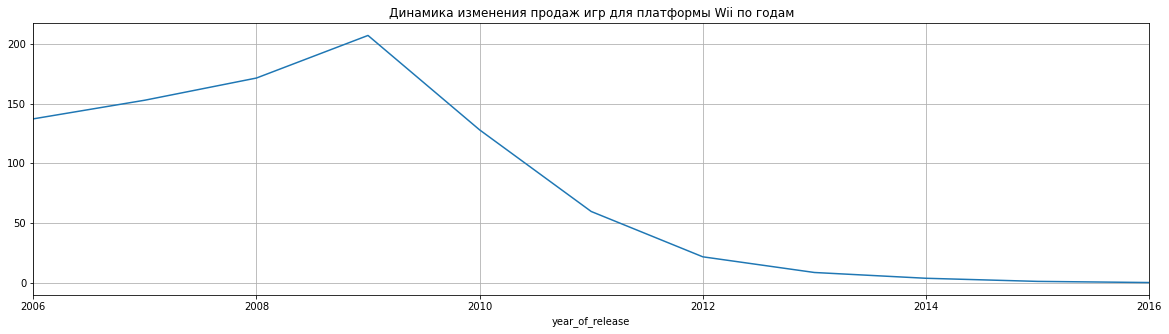

In [133]:
wii_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (2006,2016), grid = True, \
               title = 'Динамика изменения продаж игр для платформы Wii по годам', figsize = (20,5));

В период с 2006 года по 2011 года отметился резкий рост продаж игр на платформе Wii(Nintendo),но хотя и максимум продаж был выше чем у Sony и Microsoft, но доходный период был короче, после 2010 года начался резкий спад продаж и в 2014 году они упали почти до 0.

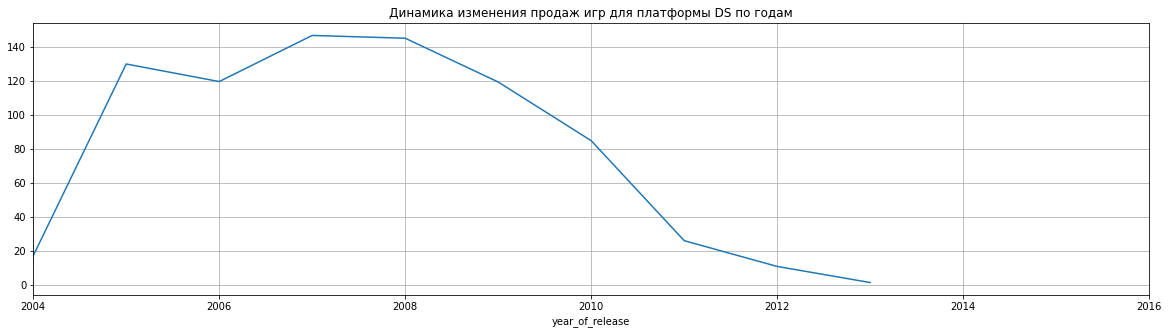

In [134]:
ds_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (2004,2016), grid = True, \
               title = 'Динамика изменения продаж игр для платформы DS по годам', figsize = (20,5));

На 5 месте рейтинга опять Nintendo со своей портативной консолью DS.Резкий захват рынка с 2004 года и такой же резкий спад начиная с 2010 года, максимум сопоставим с лидерами рейтинга (PS2,PS3 и X360).

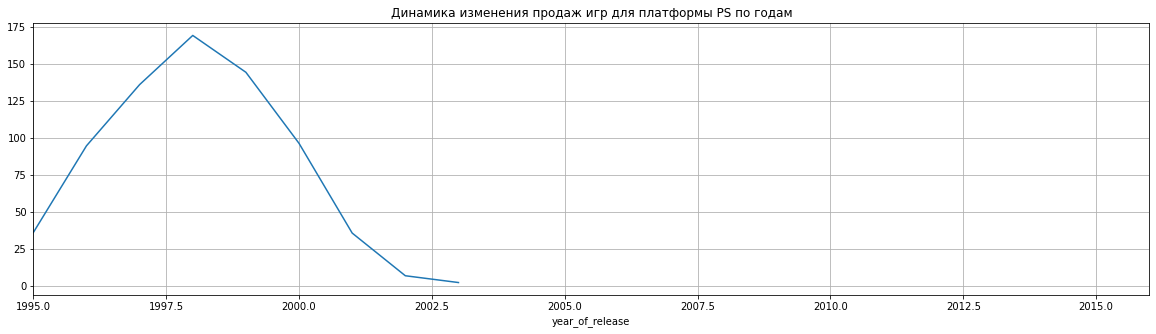

In [135]:
ps_year.plot(x = 'year_of_release', y ='sale_sum',xlim = (1995,2016), grid = True, \
               title = 'Динамика изменения продаж игр для платформы PS по годам', figsize = (20,5));

Плавный стабильный рост продаж игр для PS с 1994 года по 1998 год и с 1998 года такой же плавный спад до 2002 года. Максимум продаж в 1998 году почти 175 млн игр для платформы PS.

**Вывод:** По найденым выше зависимостям можно сказать, что в среднем продолжительность жизни каждой платформы составляет около 8 лет.Период расвета приходится на 4 год. Предположу, что новая платформа позволяет вывести игры на качественно новый уровень, что подогревает интерес геймеров и начинается рост продаж игр новой платформы. Вероятно, резкого всплеска продаж с появлением новинок не происходит, так как сами игровые приставки стоят не дешево, и должно пройти некоторое время, чтобы произошла замена у пользователей. Обычно игры, выпущенные для новой игроой платформы не совместимы с предыдущими версиями, поэтому необходимо некоторое время, чтобы набрать популярность на рынке игр.

На основе полученных выше зависимостей был выбран временной период, данные из которого можно будет использовать для формирования прогноза на рынке игр на будущий год. По построенным графикам я предположила,что расцвет популярности игры приходится в среднем на 4 год продаж. Логично предположить, что в предстоящем году на рынке будут популярны игры, у которых будущий год будет 3-4 с момента выпуска игровой платформы. Чтобы лучше оценить динамику роста популярности лучше посмотреть чуть больший период. Поэтому посмотрим период за 4 года до 2017 года.

**Вывод:** 
 Ни одна из представленных в DF игровых платформ не находится в зоне роста в 2016 году. Но игровые платформы PS4 и XOne и даже 3DS, всё еще продают несколько десятков миллионов копий в год. Можно взять их в качестве флагманов игрового рынка (в пределах данного DF). Судя по тому, что продажи всех представленных игровых платформ находятся в зоне снижения продаж, есть основания предполагать, что в новом году может быть объявлено о появлении новых игровых платформ, которые в ближайшие 3-4 года потенциально могут начать захватывать игровой рынок. Стоит поискать информацию о скорых релизах и изучить их повнимательней. Но если говорить о прогнозах на 2017 год, то скорее всего основной сегмент рынка будет за PS4, XOne и 3DS.

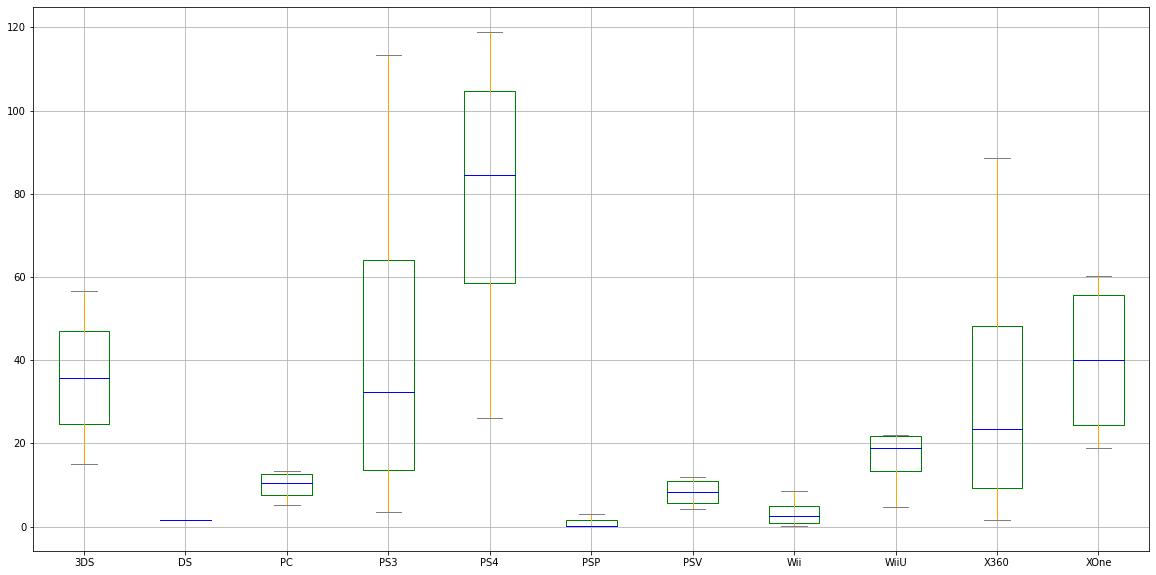

In [147]:
(
    forecast_2017.pivot_table(index = 'year_of_release', columns = 'platform', values = 'sale_sum', aggfunc = sum)
    .boxplot(grid = "True", figsize = (20,10), color = {"boxes": "Green","whiskers": "Orange","medians": "Blue","caps": "Gray"})
);


**Вывод:** 
    Картина на диаграмме разброса показывает, что игровые платформы Sony, PS3 и PS4, принесли своим разработчикам самую большие продажи игр за анализируемый период, количество проданных игр для PS3 в основной массе лежит в диапазоне 15-65 млн копий, медианное значение расположено в районе 35 млн копий. Но,похоже, что PS4 пользовалась большей популярностью, в среднем от 59 до 115 млн копий с медианой около 85 млн. копий. Следующей по популярности идут игровые платформы Microsoft, X360 и XOne,XOne оказалась несколько популярней X360, количество проданных копий больше и медианное значение лежит выше, но для X360 тоже были минуты славы усы диаграммы тянутся аж до 90 млн. копий. На третье место можно поставить платформу 3DS (Nintendo) её продажи сконцентрировались в области 25-48 млн копий, особенно больших скачков не отмечалось, медианные значения в районе 35 млн копий. Платформы PC,PSV, WiiU расположились в зоне 20 млн проданных копий - 4-е место в рейтинге. Платформы DS,PSP,Wii не преодолели барьер и в 15 млн проданных копий, разместим их на 5-м месте по популярности, расцвет DS не попал на выбранные годы.

Была проведена оценка влияния отзывов пользователей и критиков на продажи внутри популярной платформы PS4.

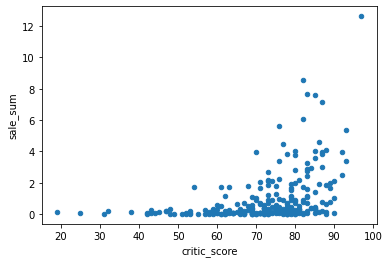

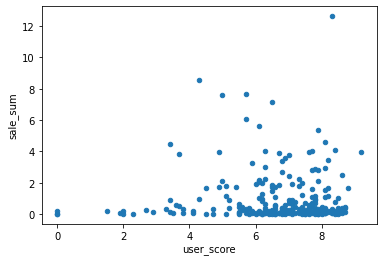

In [148]:
(
    forecast_2017.query('platform =="PS4"and critic_score != 0')
    .plot(x = "critic_score", y = "sale_sum", kind = "scatter")
);
(
    forecast_2017.query('platform =="PS4"and critic_score != 0')
    .plot(x = "user_score", y = "sale_sum", kind = "scatter")
);

Оценка влияния отзывов пользователей и критиков на продажи внутри популярной платформы PS3.

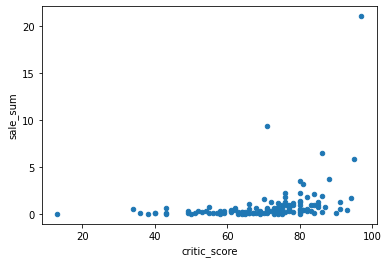

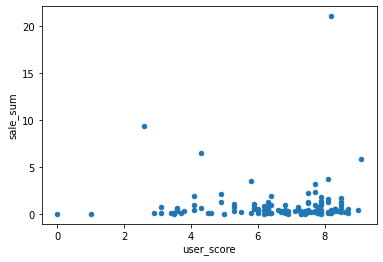

In [149]:
(
    forecast_2017.query('platform =="PS3"and critic_score != 0')
    .plot(x = "critic_score", y = "sale_sum", kind = "scatter")
);

(
    forecast_2017.query('platform =="PS3"and critic_score != 0')
    .plot(x = "user_score", y = "sale_sum", kind = "scatter")
);


Оценка влияния отзывов пользователей и критиков на продажи внутри популярной платформы XOne.

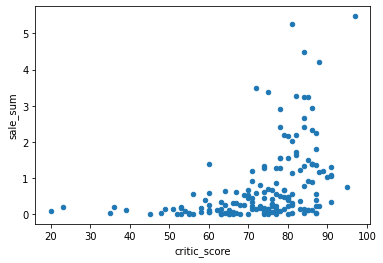

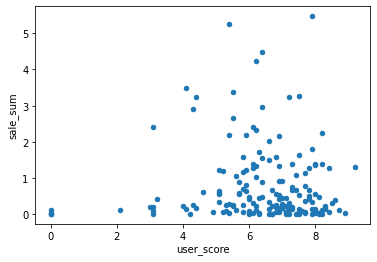

In [150]:
(
    forecast_2017.query('platform =="XOne"and critic_score != 0')
    .plot(x = "critic_score", y = "sale_sum", kind = "scatter")
);
(
    forecast_2017.query('platform =="XOne"and critic_score != 0')
    .plot(x = "user_score", y = "sale_sum", kind = "scatter")
);

Оценка влияния отзывов пользователей и критиков на продажи внутри популярной платформы 3DS.

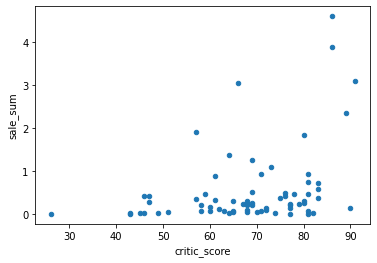

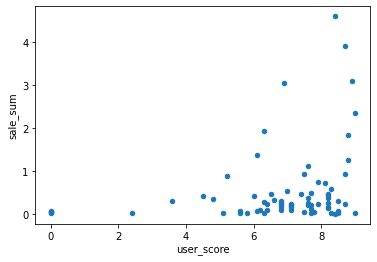

In [151]:
(
    forecast_2017.query('platform =="3DS"and critic_score != 0')
    .plot(x = "critic_score", y = "sale_sum", kind = "scatter")
);
(
    forecast_2017.query('platform =="3DS"and critic_score != 0')
    .plot(x = "user_score", y = "sale_sum", kind = "scatter")
);

Оценив корелляцию между суммарными продажами игр самых успешных платформ и оценкой критиков и пользователей получили следующие значения.

In [152]:
display(sale_score)

,score,PS4,PS3,XOne,3DS
0,critic_score,0.405,0.330,0.410,0.34
1,user_score,-0.330,0.022,-0.094,0.27


**Вывод:**
Полученные коэффициенты указывают о наличии слабой линейной зависимости между ростом продаж и ростом оценки критиков, оценки пользователей не имеют линейной связи с значениями суммарных продаж.

Распределение игр по жанрам:

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64

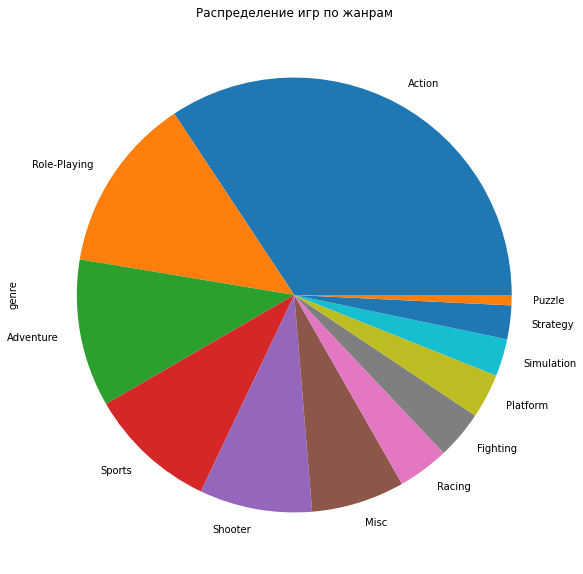

In [153]:
display(forecast_2017['genre'].value_counts())
forecast_2017['genre'].value_counts().plot(kind='pie', title = 'Распределение игр по жанрам', figsize = (10,10));

Жанр Action впереди планеты всей, Role-Playing, Adventure, Sports, Shooter и Misc занимают практически равные доли датафрейма, самые непопулярные:Racing,Fighting,Platform,Simulation,Strategy,Puzzle.

Изучено какие жанры игр продаются лучше всего. 

genre
Shooter         0.450
Sports          0.240
Platform        0.225
Role-Playing    0.125
Fighting        0.125
Racing          0.120
Action          0.110
Simulation      0.100
Misc            0.100
Strategy        0.080
Puzzle          0.060
Adventure       0.030
Name: sale_sum, dtype: float64

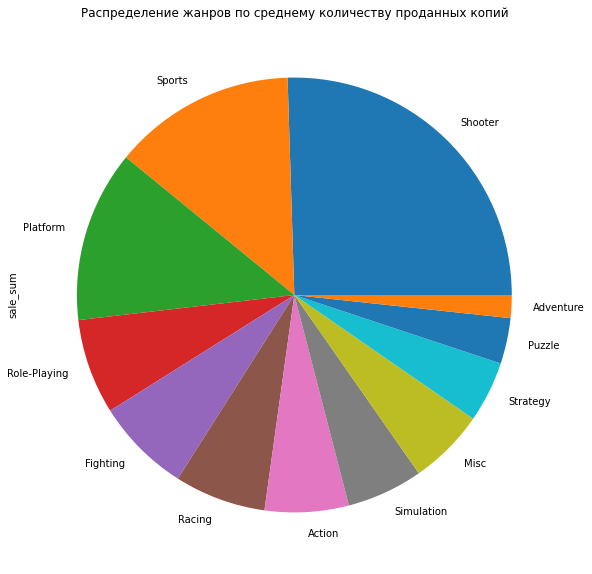

In [154]:
display(forecast_2017.groupby(by = "genre")['sale_sum'].median().sort_values(ascending = False))

(
    forecast_2017.groupby(by = "genre")['sale_sum'].median()
    .sort_values(ascending = False)
    .plot(kind='pie', title = 'Распределение жанров по среднему количеству проданных копий',figsize = (10,10))
);

**Вывод:** По среднему количеству проданных копий самым продаваемым оказался жанр Shooter.

На втором месте близко расположились жанры Sports и Platform. 

Третье место поделили: Role-Playing, Fighting, Racing 

Четвертое место делят: Action, Simulation, Misc, Strategy 

Ну и в хвосте рейтинга: Puzzle, Adventure 

Интересно отметить тот факт, что самым популярным жанром игры в датасете был Action, а вот по среднему(медианному) количеству проданных копий оказался, всего лишь на третьем, да и то не один, следующий по популярности жанры Role-Playing и Adventure вообще по среднему количеству копий переместились на 3 и 5 место, соответственно. А жанры Sports и  Shooter перемстились по среднему количеству проданных копий на 1-е и 2-е место. И бедный на разнообразие игр Platform занял почетное второе место по среднему количеству проданных копий.
Да, не всегда количество переходит в качество.

**ПОРТРЕТ ПОЛЬЗОВАТЕЛЯ КАЖДОГО РЕГИОНА**

1. ТОП-5 самых популярных игровых платформ для регионов NA, EU и JP:

Для региона Северная Америка (NA):

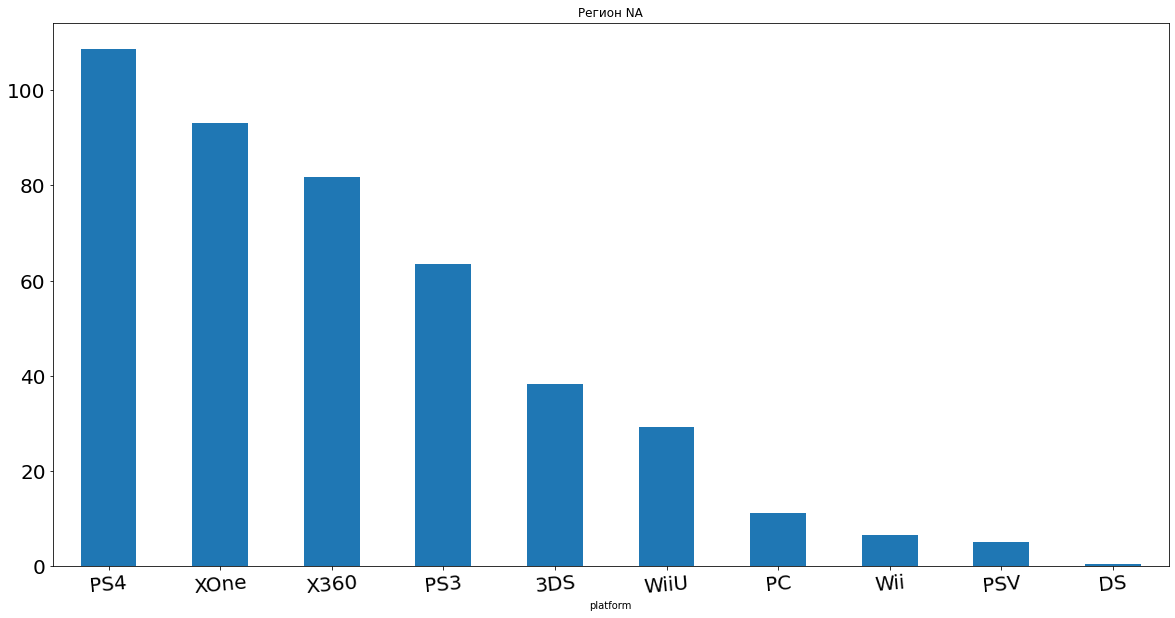

In [155]:
(forecast_2017.query('na_sales != 0')
 .groupby(by = "platform")['na_sales'].sum().sort_values(ascending = False)
.plot(x = "platform",kind="bar",rot=5, fontsize=20, figsize = (20,10),title = 'Регион NA'));

Для региона Европа (EU):

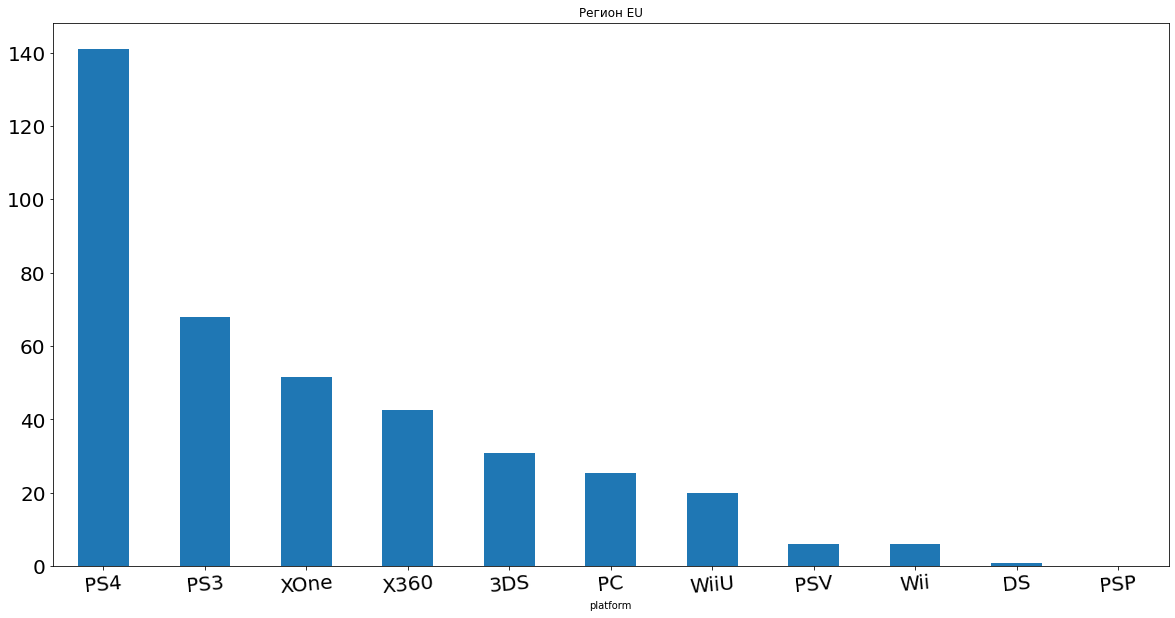

In [156]:
(forecast_2017.query('eu_sales != 0')
 .groupby(by = "platform")['eu_sales'].sum().sort_values(ascending = False)
 .plot(x = "platform",kind="bar",rot=5, fontsize=20, figsize = (20,10),title = 'Регион EU'));


Для региона Япония (JP):

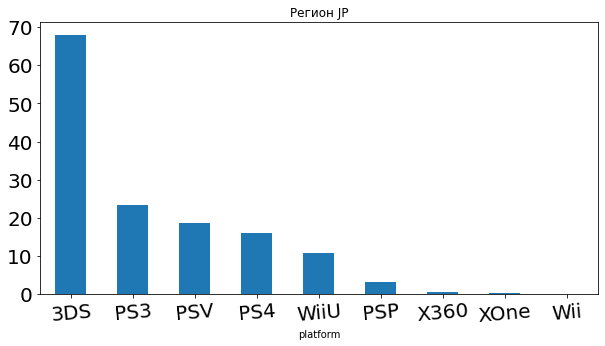

In [157]:
(forecast_2017.query('jp_sales != 0')
 .groupby(by = "platform")['jp_sales'].sum().sort_values(ascending = False)
 .plot(x = "platform",kind="bar",rot=5, fontsize=20, figsize = (10,5),title = 'Регион JP'));


In [158]:
display(reiting_platform_reg)

,place,NA,EU,JP
0,1_st_place,PS4,PS4,3DS
1,2_nd_place,XOne,PS3,PS3
2,3_rd_place,X360,XOne,PSV
3,4_th_place,PS3,X360,PS4
4,5_th_place,3DS,3DS,WiiU


**Вывод:**
Изучив рейтинг топ-5 игровых платформ в различном регионе можно увидеть логичное распределение лидеров: Япония предпочитает игровые платформы японского происхождения, а вот жители региона Северная Америка и Евросоюза близки в культурном отношении между собой и выбирают лидером продукт американской компании SONY - игровую платформу PS4. Но в Европейском регионе PS4 имеет ощутимый отрыв от платформ,стоящих на более низких позициях рейтинга. А вот в странах Северной Америки позиции XOne и X360 дышат в спину PS4. Японские игровые платформы замыкают топ-5 для Северной Америки и Евросоюза. Все логично, эндемичные компании выпускают игры с учетом приоритетов и национальных особенностей своего региона, что может объяснить такое различие в рейтингах по регионам.

2.Самые популярные жанры (топ-5):

Для региона NA (Северная Америка):

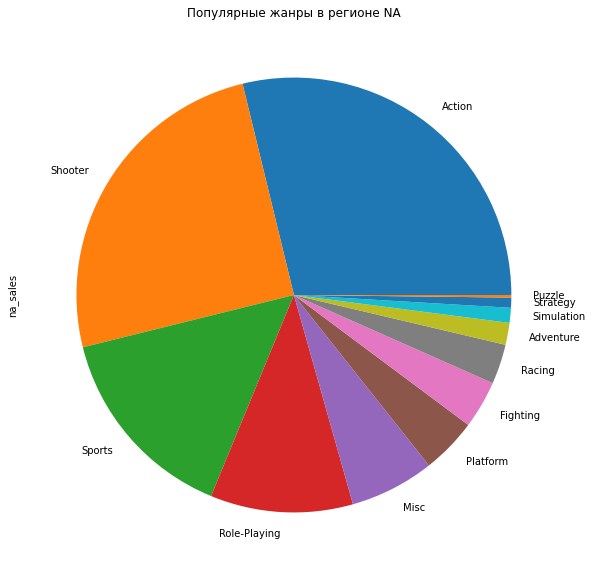

In [159]:
(forecast_2017.groupby(by = "genre")['na_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Популярные жанры в регионе NA',figsize = (10,10))
);

Для региона EU (Евросоюз):

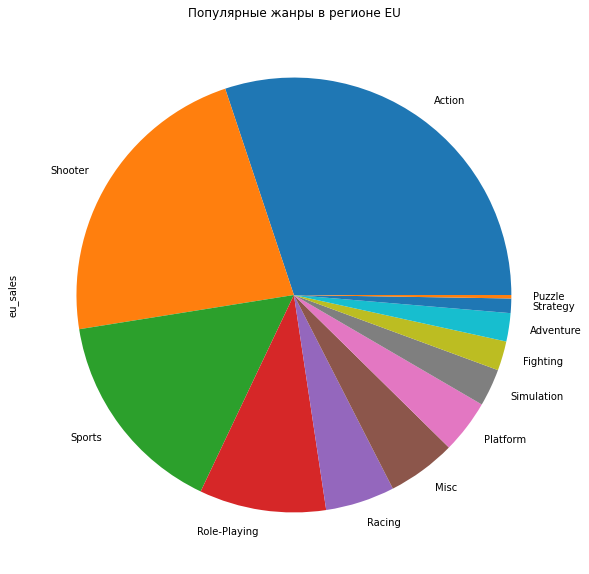

In [160]:
(forecast_2017.groupby(by = "genre")['eu_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Популярные жанры в регионе EU',figsize = (10,10))
);

Для региона JP (Япония):

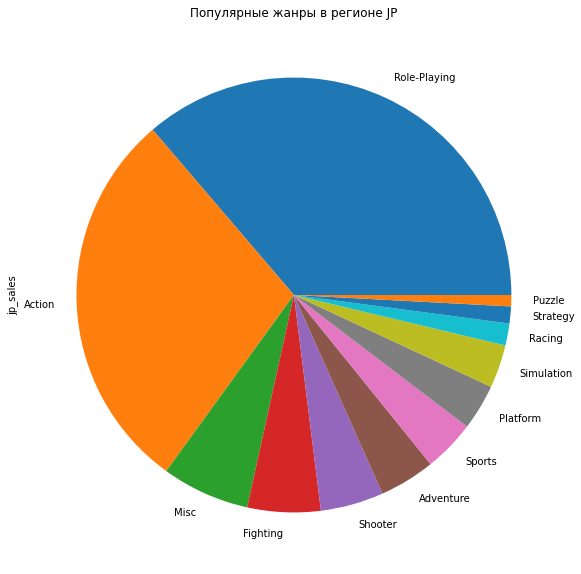

In [161]:
(forecast_2017.groupby(by = "genre")['jp_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Популярные жанры в регионе JP',figsize = (10,10))
);

In [162]:
data3 = [
    ["1_st_place", "Action", "Action", "Role-Playing"],
    ["2_nd_place", "Shooter", "Shooter", "Action"],
    ["3_rd_place", "Sports", "Sports", "Misc"],
    ["4_th_place", "Role-Playing", "Role-Playing", "Fighting"],
    ["5_th_place", "Misc", "Racing", "Shooter"]
]
columns3 = ["place", "NA", "EU","JP"]
reiting_genre_reg = pd.DataFrame(data = data3, columns = columns3)


In [163]:
display(reiting_genre_reg)

,place,NA,EU,JP
0,1_st_place,Action,Action,Role-Playing
1,2_nd_place,Shooter,Shooter,Action
2,3_rd_place,Sports,Sports,Misc
3,4_th_place,Role-Playing,Role-Playing,Fighting
4,5_th_place,Misc,Racing,Shooter


Распределение жанровых предпочтений в рейтинге тоже вполне объяснимо различиями в культуре представленных регионов. 
В Японии лидируют Role-Playing и Action (почти на одном уровне по количеству проданных копий игр), затем идет смешаный жанр misc, Fighting и Shooter(близки по количеству проданных копий).
В регионе NA первую позицию занимает жанр Action, но продажи Shooter не сильно от него отстают. Жанры Sports, Role-Playing и misc близки по количеству проданных копий и расположились на последних 3-х ступенях рейтинга.
Регион EU отличается уверенным лидирством жанра Action. Затем с небольшим разрывом 2-е и третье место за Shooter и Sports.
Замыкают рейтинг Role-Playing и Racing (количества проданных копий также близки).

3. Разберемся как рейтинг ESRB влияет на продажи в отдельном регионе?

Для региона NA:

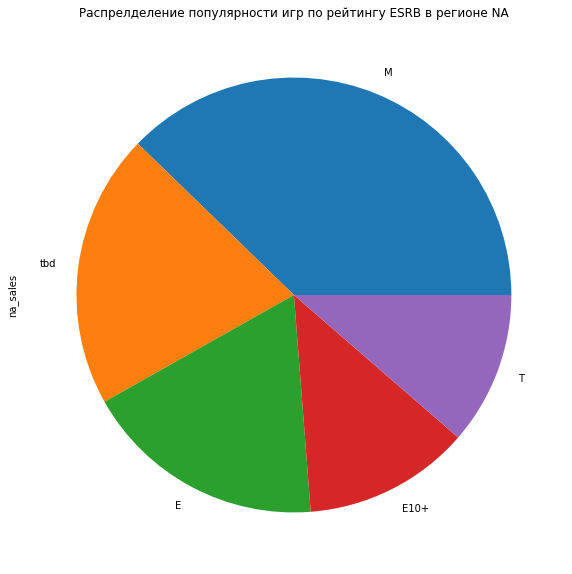

In [164]:
(forecast_2017.groupby('rating')['na_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Распрелделение популярности игр по рейтингу ESRB в регионе NA',figsize = (10,10))
);

Для региона EU:

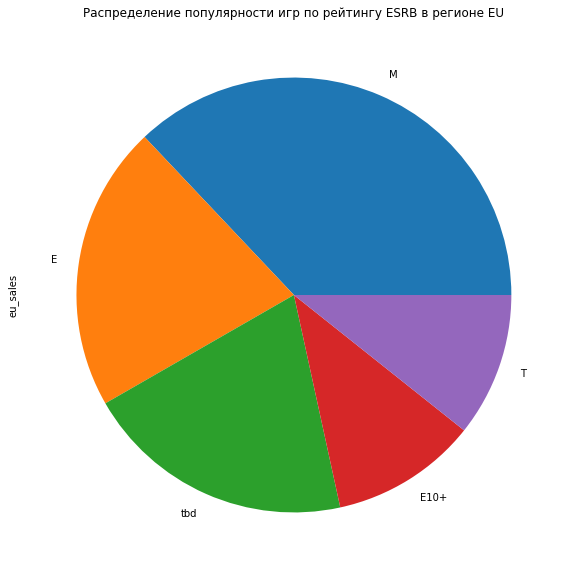

In [165]:
(forecast_2017.groupby('rating')['eu_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Распределение популярности игр по рейтингу ESRB в регионе EU',figsize = (10,10))
);

Для региона JP:

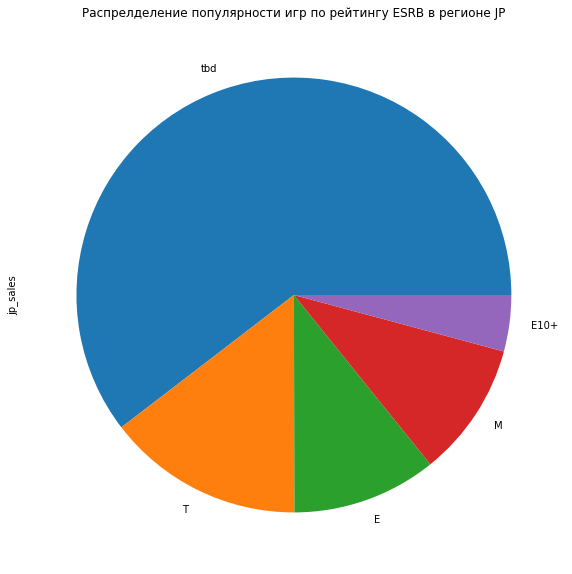

In [166]:
(forecast_2017.groupby('rating')['jp_sales'].sum().sort_values(ascending = False)
 .plot(kind='pie', title = 'Распрелделение популярности игр по рейтингу ESRB в регионе JP',figsize = (10,10))
);

3. Влияние рейтинга ESRB  на продажи в отдельном регионе:

        Для региона NA:  M       165.21
                       tbd      89.42
                       E        79.05
                       E10+     54.24
                       T        49.79
        Для региона EU:  M       145.32
                       E        83.36
                       tbd      78.91
                       E10+     42.69
                       T        41.95
        
         Для региона JP: tbd     85.05
                        T       20.59
                        E       15.14
                        M       14.11
                        E10+     5.89

**Выводы:**
Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. Логично предположить, что рейтинги этой организации будут близки регионам NA и EU.
В регионах NA и EU топ-5 рейтинга ESRB схожи друг с другом: лидируют игры с рейтингом «M» («Mature») — «Для взрослых», на втором месте расположились таинственные "tbd"(пропуск в данных) и  «E» («Everyone») — «Для всех», третье место за «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» и последнее место за «T» («Teen») — «Подросткам». 

А что с регионом JP? Возможно, американская классификация не очень близка японцам, но по данным датафрейма на первом месте стоят игры с пропущенным значением рейтинга (и первое место существенно опережает всех остальных), на втором месте игры с рейтингом «T» («Teen») — «Подросткам», на третьем: «E» («Everyone») — «Для всех» и «M» («Mature») — «Для взрослых» и на последнем «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше».

Необходимо отметить, что в рейтинге присутствует на втором месте (в NA) и третьем(в EU) и первом (в JP) значение рейтинга "tbd",так мы обозначили пропущенные значения. Они изначально отсутствовали в датасете в существенном объеме(более 50%). И если бы они были идентифицированы, то распределение по рейтингу могло быть иным. А в сложившейся ситуации данный показатель считаю смещенным и неинформативным. Необходимо дополучить информацию по рейтингу ESRB, чтобы на его основе делать прогнозы.

**Итоговый вывод:** Основные различия в популярности тех или иных игр лежит в культурных и национальных особенностях потребителя. Рассматриваемые регионы NA и EU культурологически достаточно близки, по этой причине и предпочтения в игровых платформах и жанрах игр очень схожи. А вот Япония отличается от них выбором японской игровой платформы и  жанров, которые больше отвечают  внутренней культуре жителей страны восходяего солнца.

Из всех изученных факторов, влияющих на успех продаж (в порядке убывания значимости фактора): 
1. Регион продаж;
2. Популярная на 2016 год игровая платформа(быстро они не меняются);
3. Предпочитаемый в регионе жанр игр.

Для оценки влияния на продажи игр рейтингов пользователей, критиков и ESRB необходимо собрать по играм больше информации о их рейтингах. В настоящем датафрейме в среднем 50% игр в столбце рейтинг стоит пропущенное значение. По имеющимся данным есть очень слабая положительная корелляция количества проданных копий с рейтингом критика. Требуются исследования на более представительной выборке по оценкам игр.

    